## CLEANING THE DATASET - LOOKING FOR NANs

permalink               True
name                    True
homepage_url            True
category_list           True
 market                 True
 funding_total_usd      True
status                  True
country_code            True
state_code              True
region                  True
city                    True
funding_rounds          True
founded_at              True
founded_month           True
founded_quarter         True
founded_year            True
first_funding_at        True
last_funding_at         True
seed                    True
venture                 True
equity_crowdfunding     True
undisclosed             True
convertible_note        True
debt_financing          True
angel                   True
grant                   True
private_equity          True
post_ipo_equity         True
post_ipo_debt           True
secondary_market        True
product_crowdfunding    True
round_A                 True
round_B                 True
round_C                 True
round_D       

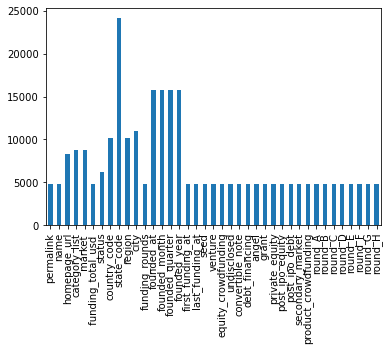

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('investments_VC.csv', encoding='latin_1', sep=',')

print(df.isna().any())

# Bar plot of missing values by variable
df.isna().sum().plot(kind="bar")
plt.show()


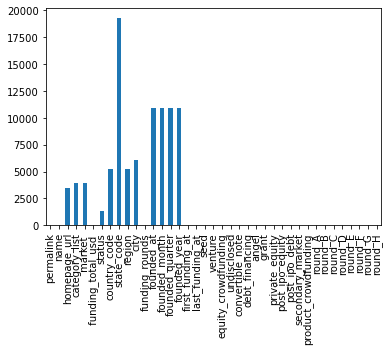

In [3]:
#Eliminamos las ultimas filas que solo contienen Nan

df_clean = df.dropna(how='all')

df_clean.isna().sum().plot(kind="bar")
plt.show()

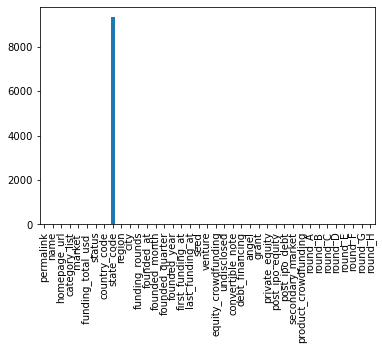

permalink                   name  \
0               /organization/waywire               #waywire   
2       /organization/rock-your-paper      'Rock' Your Paper   
3      /organization/in-touch-network      (In)Touch Network   
8      /organization/004-technologies       004 Technologies   
10          /organization/1-2-3-listo            1,2,3 Listo   
...                               ...                    ...   
49430  /organization/zyraz-technology       Zyraz Technology   
49432        /organization/zytoprotec             Zytoprotec   
49433             /organization/zzish                  Zzish   
49435       /organization/zzzzapp-com  Zzzzapp Wireless ltd.   
49437                 /organization/x                  [x+1]   

                            homepage_url  \
0                 http://www.waywire.com   
2           http://www.rockyourpaper.org   
3          http://www.InTouchNetwork.com   
8      http://004gmbh.de/en/004-interact   
10               http://www.123listo.com   
...                                  ...   
49430               http://www.zyraz.com   
49432          http://www.zytoprotec.com   
49433               http://www.zzish.com   
49435             http://www.zzzzapp.com   
49437           http://www.xplusone.com/   

                                           category_list  \
0             |Entertainment|Politics|Social Media|News|   
2                                 |Publishing|Education|   
3      |Electronics|Guides|Coffee|Restaurants|Music|i...   
8                                             |Software|   
10                                          |E-Commerce|   
...                                                  ...   
49430                                    |Biotechnology|   
49432                                    |Biotechnology|   
49433  |Analytics|Gamification|Developer APIs|iOS|And...   
49435      |Web Development|Advertising|Wireless|Mobile|   
49437                              |Enterprise Software|   

                     market   funding_total_usd      status country_code  \
0                      News           17,50,000    acquired          USA   
2                Publishing              40,000   operating          EST   
3               Electronics           15,00,000   operating          GBR   
8                  Software                 -     operating          USA   
10               E-Commerce              40,000   operating          CHL   
...                      ...                 ...        ...          ...   
49430         Biotechnology         1,54,19,877      closed          MYS   
49432         Biotechnology           26,86,600   operating          AUT   
49433             Education            3,20,000   operating          GBR   
49435       Web Development              97,398   operating          HRV   
49437   Enterprise Software         4,50,00,000   operating          USA   

      state_code                 region  ... secondary_market  \
0             NY          New York City  ...              0.0   
2            NaN                Tallinn  ...              0.0   
3            NaN                 London  ...              0.0   
8             IL  Springfield, Illinois  ...              0.0   
10           NaN               Santiago  ...              0.0   
...          ...                    ...  ...              ...   
49430        NaN            MYS - Other  ...              0.0   
49432        NaN                 Vienna  ...              0.0   
49433        NaN                 London  ...              0.0   
49435        NaN                  Split  ...              0.0   
49437         NY          New York City  ...              0.0   

       product_crowdfunding     round_A     round_B round_C  round_D round_E  \
0                       0.0         0.0         0.0     0.0      0.0     0.0   
2                       0.0         0.0         0.0     0.0      0.0     0.0   
3                       0.0         0.0         0.0     0.0      0.0     0.

In [4]:
#Eliminamos las filas que contienen Nan, excepto los Nan de la columna State_code
#Las columna de State_code es exclusiva para las startups de USA

seleccion = df_clean.columns[2:8]
df_clean = df_clean.dropna(subset=seleccion, how='any')

seleccion2 = df_clean.columns[10:]
df_clean = df_clean.dropna(subset=seleccion2, how='any')

df_clean.isna().sum().plot(kind="bar")
plt.show()
df_clean

In [5]:
from IPython.display import display

#display(df.head())
#print(df.info())
#print(df.shape)

#print(df.describe())
#print(df.values)
#print(df.columns)
#print(df.index)
print(df_clean.columns)

#CREAR UNA NUEVA COLUMNA 'funding_total' CON LA SUMA DE TODOS LOS FUNDINGS QUE RECIBE CADA STARTUP
#SE CREA ESTA COLUMNA PORQUE LA COLUMNA EXISTENTE ' funding_total_usd ' PRESENTA ERRORES EN LOS DATOS
df_clean['funding_total'] = df_clean[df_clean.columns[18:31]].sum(axis=1) 

#REDUCIR A SOLO STARTUPS FUNDADAS DE 2000 EN ADELANTE
millennials = df_clean['founded_year'] > 1999
print('\n DATAFRAME df_clean \n')
display(df_clean[millennials])

'''
#ELIMINAMOS LAS SIGUIENTES COLUMNAS
df_sin_cols = df.drop(['permalink', 'state_code', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1)
 
display(df_sin_cols)
'''
print(round(df_clean['funding_total'].mean(),2))
print(round(df_clean['funding_total'].median(),2))

#REDUCIMOS EL ESPECTRO A LAS STARTUPS QUE HAN RECIBIDO FINANCIACION EXTERNA
funded = (df_clean['seed'] > 0) | (df_clean['venture'] > 0)
df_funded = df_clean[funded]
print('\n DATAFRAME df_funded \n')
display(df_funded[['seed', 'venture', 'funding_total']])

print('La media de inversion en fase seed es: ', round(df_funded['seed'].mean(),2))
print('La MEDIANA de inversion en fase seed es: ', round(df_funded['seed'].median(),2))
print('La MODA de inversion en fase seed es: ', round(df_funded['seed'].mode(),2))
print('El MINIMO de inversion en fase seed es: ', round(df_funded['seed'].min(),2))
print('EL MAXIMO de inversion en fase seed es: ', round(df_funded['seed'].max(),2))
print('La VARIACION de inversion en fase seed es: ', round(df_funded['seed'].var(),2))
print('El QUANTILE de inversion en fase seed es: ', round(df_funded['seed'].quantile(0.9),2))
print('La STD DEV de inversion en fase seed es: ', round(df_funded['seed'].std(),2), '\n')

print('La media de inversion en fase venture es: ', round(df_funded['venture'].mean(),2))
print('La MEDIANA de inversion en fase venture es: ', round(df_funded['venture'].median(),2))
print('La MODA de inversion en fase sventure es: ', round(df_funded['venture'].mode(),2))
print('El MINIMO de inversion en fase venture es: ', round(df_funded['venture'].min(),2))
print('EL MAXIMO de inversion en fase venture es: ', round(df_funded['venture'].max(),2))
print('La VARIACION de inversion en fase venture es: ', round(df_funded['venture'].var(),2))
print('La STD DEV de inversion en fase venture es: ', round(df_funded['venture'].std(),2), '\n')

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

 DATAFRAME df_clean 



permalink                   name  \
0               /organization/waywire               #waywire   
2       /organization/rock-your-paper      'Rock' Your Paper   
3      /organization/in-touch-network      (In)Touch Network   
8      /organization/004-technologies       004 Technologies   
10          /organization/1-2-3-listo            1,2,3 Listo   
...                               ...                    ...   
49427          /organization/zyngenia               Zyngenia   
49428           /organization/zynstra                Zynstra   
49432        /organization/zytoprotec             Zytoprotec   
49433             /organization/zzish                  Zzish   
49435       /organization/zzzzapp-com  Zzzzapp Wireless ltd.   

                            homepage_url  \
0                 http://www.waywire.com   
2           http://www.rockyourpaper.org   
3          http://www.InTouchNetwork.com   
8      http://004gmbh.de/en/004-interact   
10               http://www.123listo.com   
...                                  ...   
49427            http://www.zyngenia.com   
49428             http://www.zynstra.com   
49432          http://www.zytoprotec.com   
49433               http://www.zzish.com   
49435             http://www.zzzzapp.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
8                                             |Software|          Software    
10                                          |E-Commerce|        E-Commerce    
...                                                  ...                ...   
49427                                    |Biotechnology|     Biotechnology    
49428                                         |Software|          Software    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    
49435      |Web Development|Advertising|Wireless|Mobile|   Web Development    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
8                    -     operating          USA         IL   
10                40,000   operating          CHL        NaN   
...                   ...        ...          ...        ...   
49427        2,50,00,000   operating          USA         MD   
49428        1,47,50,000   operating          GBR        NaN   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   
49435             97,398   operating          HRV        NaN   

                      region  ... product_crowdfunding     round_A    round_B  \
0              New York City  ...                  0.0         0.0        0.0   
2                    Tallinn  ...                  0.0         0.0        0.0   
3                     London  ...                  0.0         0.0        0.0   
8      Springfield, Illinois  ...                  0.0         0.0        0.0   
10                  Santiago  ...                  0.0         0.0        0.0   
...                      ...  ...                  ...         ...        ...   
49427       Washington, D.C.  ...                  0.0  25000000.0        0.0   
49428                   Bath  ...                  0.0   3800000.0  8400000.0   
49432                 Vienna  ...                  0.0   2686600.0        0.0   
49433                 London  ...                  0.0         0.0        0.0   
49435                  Split  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F 

15561638.41
1430000.0

 DATAFRAME df_funded 



seed     venture  funding_total
0      1750000.0         0.0      1750000.0
2        40000.0         0.0        40000.0
3      1500000.0         0.0      1500000.0
10       40000.0         0.0        40000.0
15      400000.0   4000000.0      4400000.0
...          ...         ...            ...
49430        0.0   7991547.0     15419877.0
49432        0.0   2686600.0      2686600.0
49433   320000.0         0.0       320000.0
49435    71525.0         0.0        97398.0
49437        0.0  28000000.0     45000000.0

[23175 rows x 3 columns]

La media de inversion en fase seed es:  364395.7
La MEDIANA de inversion en fase seed es:  0.0
La MODA de inversion en fase seed es:  0    0.0
dtype: float64
El MINIMO de inversion en fase seed es:  0.0
EL MAXIMO de inversion en fase seed es:  100000000.0
La VARIACION de inversion en fase seed es:  1374365116785.1
El QUANTILE de inversion en fase seed es:  1210199.2
La STD DEV de inversion en fase seed es:  1172333.19 

La media de inversion en fase venture es:  12559442.13
La MEDIANA de inversion en fase venture es:  2000000.0
La MODA de inversion en fase sventure es:  0    0.0
dtype: float64
El MINIMO de inversion en fase venture es:  0.0
EL MAXIMO de inversion en fase venture es:  2351000000.0
La VARIACION de inversion en fase venture es:  1504373281646421.2
La STD DEV de inversion en fase venture es:  38786251.19 



In [290]:
#DETECTAR Y ELIMINAR OUTLIERS
q_funding = df_funded['funding_total'].quantile(0.99)
print('El percentil 99 en el funding_total: ', q_funding,'\n')

df_outliers = df_funded[df_funded['funding_total'] > q_funding]
print('\nEstos son las startups outliers en funding\n')
display(df_outliers)

print('La media de inversion en outliers es: ', round(df_outliers['funding_total'].mean(),2))
print('La MEDIANA de inversion en outliers es: ', round(df_outliers['funding_total'].median(),2))
print('La MODA de inversion en outliers es: ', round(df_outliers['funding_total'].mode(),2))
print('El MINIMO de inversion en outliers es: ', round(df_outliers['funding_total'].min(),2))
print('EL MAXIMO de inversion en outliers es: ', round(df_outliers['funding_total'].max(),2))
print('La VARIACION de inversion en outliers es: ', round(df_outliers['funding_total'].var(),2))
print('La STD DEV de inversion en outliers es: ', round(df_outliers['funding_total'].std(),2), '\n')

#comprobar cual es la startup con max funding
print('\nEsta es la startup con max funding\n')
print(df_outliers[['name', 'funding_total']].agg([np.max]))

#ELIMINAMOS LOS 232 OUTLIERS DEL df_funded
df_funded_no_outliers = df_funded[df_funded['funding_total'] < q_funding]
print('\nEste es el df sin los 232 outliers\n')
display(df_funded_no_outliers)

#ELIMINAMOS LOS OUTLIERS QUE TIENEN MUCHAS RONDAS DE FINANCIACION
q_funding_rounds = df_funded_no_outliers['funding_rounds'].quantile(0.90)

df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['funding_rounds'] < q_funding_rounds]

display(df_funded_no_outliers)

El percentil 99 en el funding_total:  179468999.99999896 


Estos son las startups outliers en funding



permalink             name  \
332         /organization/55tuan-com       55tuan.com   
334             /organization/58-com           58.com   
495        /organization/a123systems     A123 Systems   
553    /organization/ability-network  ABILITY Network   
612    /organization/acacia-research  Acacia Research   
...                              ...              ...   
48360           /organization/kankan           Xunlei   
48679            /organization/youku            Youku   
48845           /organization/zalora           ZALORA   
48988          /organization/zenimax          ZeniMax   
49426            /organization/zynga            Zynga   

                        homepage_url  \
332            http://www.55tuan.com   
334                http://www.58.com   
495           http://a123systems.com   
553    http://www.abilitynetwork.com   
612    http://www.acaciaresearch.com   
...                              ...   
48360          http://www.kankan.com   
48679           http://www.youku.com   
48845          http://www.zalora.com   
48988         http://www.zenimax.com   
49426           http://www.zynga.com   

                                           category_list        market   \
332                                         |E-Commerce|    E-Commerce    
334                      |Software|Internet|Curated Web|      Software    
495                  |Batteries|Clean Technology|Mobile|     Batteries    
553                                        |Health Care|   Health Care    
612                                            |Finance|       Finance    
...                                                  ...            ...   
48360                               |Web Tools|Software|     Web Tools    
48679                           |Technology|Photography|    Technology    
48845                               |E-Commerce|Fashion|    E-Commerce    
48988                                            |Games|         Games    
49426  |Technology|Facebook Applications|Networking|G...    Technology    

       funding_total_usd      status country_code state_code  \
332         20,00,00,000   operating          CHN        NaN   
334         87,67,80,000   operating          CHN        NaN   
495         50,28,60,000   operating          USA         MA   
553         58,30,00,000   operating          USA         MN   
612         24,46,00,000   operating          USA         CA   
...                   ...        ...          ...        ...   
48360       32,60,00,000   operating          CHN        NaN   
48679     1,32,00,00,000   operating          CHN        NaN   
48845       23,80,00,000   operating          SGP        NaN   
48988       58,69,74,337   operating          USA         MD   
49426       86,65,50,786   operating          USA         CA   

                 region  ... product_crowdfunding      round_A      round_B  \
332             Beijing  ...                  0.0  200000000.0          0.0   
334         CHN - Other  ...                  0.0    5000000.0    5780000.0   
495           Worcester  ...                  0.0   32000000.0   30000000.0   
553         Minneapolis  ...                  0.0          0.0          0.0   
612             Anaheim  ...                  0.0          0.0          0.0   
...                 ...  ...                  ...          ...          ...   
48360          Shenzhen  ...                  0.0    1000000.0   10000000.0   
48679          Shanghai  ...                  0.0    3000000.0   12000000.0   
48845         Singapore  ...                  0.0          0.0          0.0   
48988  Washington, D.C.  ...                  0.0          0.0          0.0   
49426       SF Bay Area  ...                  0.0   15026000.0  355187000.0   

           round_C     round_D     round_E round_F round_G  round_H  \
332            0.0         0.0         0.0     0.0     0.0      0.0   
334     60000000.0  55000000.0         0.0     0.0     0.0      0.0   
495     40000000.0  30000000.

La media de inversion en outliers es:  393652605.59
La MEDIANA de inversion en outliers es:  276186056.0
La MODA de inversion en outliers es:  0    192000000.0
1    195000000.0
2    220000000.0
3    225000000.0
4    248000000.0
5    253000000.0
6    290000000.0
7    310000000.0
dtype: float64
El MINIMO de inversion en outliers es:  179950000.0
EL MAXIMO de inversion en outliers es:  2425700000.0
La VARIACION de inversion en outliers es:  1.0263080908400744e+17
La STD DEV de inversion en outliers es:  320360436.2 


Esta es la startup con max funding

                         name  funding_total
amax  moksha8 Pharmaceuticals   2.425700e+09

Este es el df sin los 232 outliers



permalink                   name  \
0               /organization/waywire               #waywire   
2       /organization/rock-your-paper      'Rock' Your Paper   
3      /organization/in-touch-network      (In)Touch Network   
10          /organization/1-2-3-listo            1,2,3 Listo   
15      /organization/10-minutes-with        10 Minutes With   
...                               ...                    ...   
49430  /organization/zyraz-technology       Zyraz Technology   
49432        /organization/zytoprotec             Zytoprotec   
49433             /organization/zzish                  Zzish   
49435       /organization/zzzzapp-com  Zzzzapp Wireless ltd.   
49437                 /organization/x                  [x+1]   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49430           http://www.zyraz.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   
49435         http://www.zzzzapp.com   
49437       http://www.xplusone.com/   

                                           category_list  \
0             |Entertainment|Politics|Social Media|News|   
2                                 |Publishing|Education|   
3      |Electronics|Guides|Coffee|Restaurants|Music|i...   
10                                          |E-Commerce|   
15                                           |Education|   
...                                                  ...   
49430                                    |Biotechnology|   
49432                                    |Biotechnology|   
49433  |Analytics|Gamification|Developer APIs|iOS|And...   
49435      |Web Development|Advertising|Wireless|Mobile|   
49437                              |Enterprise Software|   

                     market   funding_total_usd      status country_code  \
0                      News           17,50,000    acquired          USA   
2                Publishing              40,000   operating          EST   
3               Electronics           15,00,000   operating          GBR   
10               E-Commerce              40,000   operating          CHL   
15                Education           44,00,000   operating          GBR   
...                      ...                 ...        ...          ...   
49430         Biotechnology         1,54,19,877      closed          MYS   
49432         Biotechnology           26,86,600   operating          AUT   
49433             Education            3,20,000   operating          GBR   
49435       Web Development              97,398   operating          HRV   
49437   Enterprise Software         4,50,00,000   operating          USA   

      state_code         region  ... product_crowdfunding     round_A  \
0             NY  New York City  ...                  0.0         0.0   
2            NaN        Tallinn  ...                  0.0         0.0   
3            NaN         London  ...                  0.0         0.0   
10           NaN       Santiago  ...                  0.0         0.0   
15           NaN         London  ...                  0.0   4000000.0   
...          ...            ...  ...                  ...         ...   
49430        NaN    MYS - Other  ...                  0.0   7991547.0   
49432        NaN         Vienna  ...                  0.0   2686600.0   
49433        NaN         London  ...                  0.0         0.0   
49435        NaN          Split  ...                  0.0         0.0   
49437         NY  New York City  ...                  0.0  16000000.0   

          round_B round_C round_D  round_E round_F round_G  round_H  \
0             0.0     0.0     0.0      0.0     0.0     0.0      0.0   
2             0.0     0.0     0.0      0.0     0.0     0.0      0.0   
3             0.0     0.0     0.0      0.0     0.0    

permalink                     name  \
0                      /organization/waywire                 #waywire   
2              /organization/rock-your-paper        'Rock' Your Paper   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ... product_crowdfunding     round_A    round_B  \
0         New York City  ...                  0.0         0.0        0.0   
2               Tallinn  ...                  0.0         0.0        0.0   
3                London  ...                  0.0         0.0        0.0   
10             Santiago  ...                  0.0         0.0        0.0   
15               London  ...                  0.0   4000000.0        0.0   
...                 ...  ...                  ...         ...        ...   
49424         Barcelona  ...                  0.0   1699920.0  2105600.0   
49425      Philadelphia  ...                  0.0         0.0        0.0   
49427  Washington, D.C.  ...                  0.0  25000000.0        0.0   
49432            Vienna  ...                  0.0   2686600.0        0.0   
49433            London  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F round_G

## SEARCHING FOR OUTLIERS

In [291]:
#"IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. 
#It's an alternative to standard deviation that is helpful if your data contains outliers.

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

print('\nDatos CON outliers')
print(df_funded[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))

print('\nDatos SIN outliers')
print(df_funded_no_outliers[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))


Datos CON outliers
            seed     venture  funding_total
iqr     250000.0  11000000.0     11650000.0
median       0.0   2000000.0      2818000.0

Datos SIN outliers
            seed    venture  funding_total
iqr     270000.0  7000000.0      7375000.0
median       0.0  1110000.0      2000000.0


Con outliers
Sin outliers


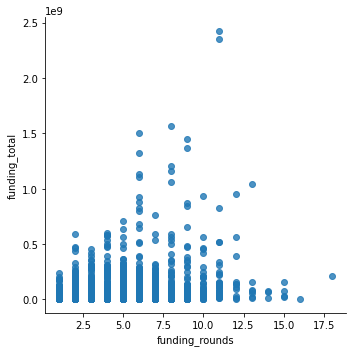

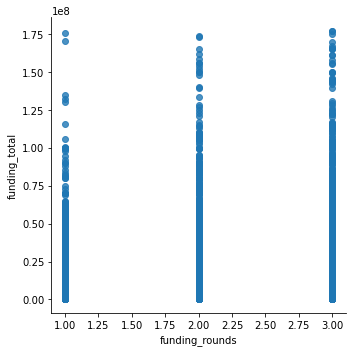

In [292]:

print('Con outliers')
regresion = sns.lmplot(y='funding_total', x='funding_rounds', data=df_funded, fit_reg=False);

print('Sin outliers')
regresion = sns.lmplot(y='funding_total', x='funding_rounds', data=df_funded_no_outliers, fit_reg=False);


Con outliers


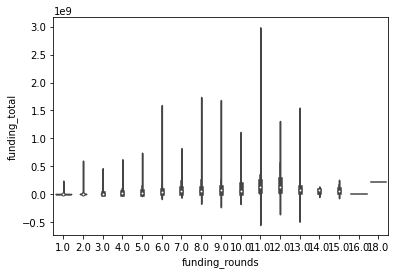

Sin outliers


<AxesSubplot:xlabel='funding_rounds', ylabel='funding_total'>

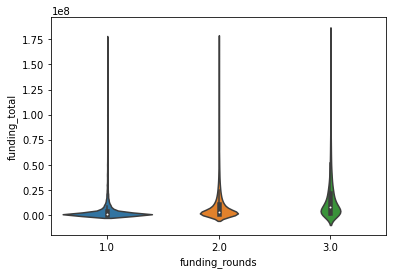

In [293]:

print('Con outliers')
sns.violinplot(y='funding_total', x='funding_rounds', data=df_funded)
plt.show()

print('Sin outliers')
sns.violinplot(y='funding_total', x='funding_rounds', data=df_funded_no_outliers)

Con outliers


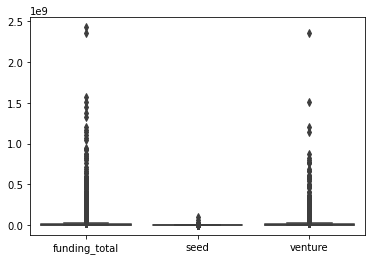

Sin outliers


<AxesSubplot:>

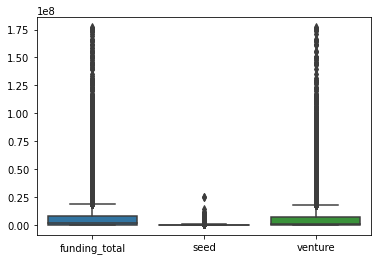

In [294]:
print('Con outliers')
sns.boxplot(data=df_funded[['funding_total', 'seed', 'venture']])
plt.show()

print('Sin outliers')
sns.boxplot(data=df_funded_no_outliers[['funding_total', 'seed', 'venture']])

Con outliers
SIN outliers


<BarContainer object of 19605 artists>

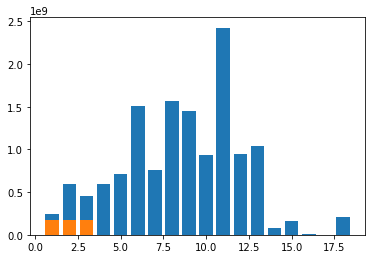

In [295]:

print('Con outliers')
y = df_funded['funding_total']
x = df_funded['funding_rounds']
plt.bar(x, y)

print('SIN outliers')
ys = df_funded_no_outliers['funding_total']
xs = df_funded_no_outliers['funding_rounds']
plt.bar(xs, ys)

In [296]:
df_funded_no_outliers['founded_at'].dtype

dtype('O')

## MODIFICANDO EL TIPO DE LAS COLUMNAS CON FECHAS PARA PODER TRABAJAR CON ELLAS

In [297]:
#Transformamos el formato de la columna con la fecha de fundación de 'object' a 'datetime'
df_funded_no_outliers['founded_at'] = pd.to_datetime(df_funded_no_outliers['founded_at'])


In [298]:
#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
#df_funded_no_outliers['first_funding_at'] = pd.to_datetime(df_funded_no_outliers['first_funding_at'])
df_funded_no_outliers['first_funding_at'].min()
display(df_funded_no_outliers)

permalink                     name  \
0                      /organization/waywire                 #waywire   
2              /organization/rock-your-paper        'Rock' Your Paper   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ... product_crowdfunding     round_A    round_B  \
0         New York City  ...                  0.0         0.0        0.0   
2               Tallinn  ...                  0.0         0.0        0.0   
3                London  ...                  0.0         0.0        0.0   
10             Santiago  ...                  0.0         0.0        0.0   
15               London  ...                  0.0   4000000.0        0.0   
...                 ...  ...                  ...         ...        ...   
49424         Barcelona  ...                  0.0   1699920.0  2105600.0   
49425      Philadelphia  ...                  0.0         0.0        0.0   
49427  Washington, D.C.  ...                  0.0  25000000.0        0.0   
49432            Vienna  ...                  0.0   2686600.0        0.0   
49433            London  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F round_G

In [299]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['first_funding_at'] >= '2000-01-01']
print('\nEste es el df sin startups financiadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups financiadas antes del 2000-01-01



permalink                     name  \
0                      /organization/waywire                 #waywire   
2              /organization/rock-your-paper        'Rock' Your Paper   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ... product_crowdfunding     round_A    round_B  \
0         New York City  ...                  0.0         0.0        0.0   
2               Tallinn  ...                  0.0         0.0        0.0   
3                London  ...                  0.0         0.0        0.0   
10             Santiago  ...                  0.0         0.0        0.0   
15               London  ...                  0.0   4000000.0        0.0   
...                 ...  ...                  ...         ...        ...   
49424         Barcelona  ...                  0.0   1699920.0  2105600.0   
49425      Philadelphia  ...                  0.0         0.0        0.0   
49427  Washington, D.C.  ...                  0.0  25000000.0        0.0   
49432            Vienna  ...                  0.0   2686600.0        0.0   
49433            London  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F round_G

In [300]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE LA ULTIMA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['last_funding_at'] >= '2000-01-01']
print('\nEste es el df sin startups financiadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups financiadas antes del 2000-01-01



permalink                     name  \
0                      /organization/waywire                 #waywire   
2              /organization/rock-your-paper        'Rock' Your Paper   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ... product_crowdfunding     round_A    round_B  \
0         New York City  ...                  0.0         0.0        0.0   
2               Tallinn  ...                  0.0         0.0        0.0   
3                London  ...                  0.0         0.0        0.0   
10             Santiago  ...                  0.0         0.0        0.0   
15               London  ...                  0.0   4000000.0        0.0   
...                 ...  ...                  ...         ...        ...   
49424         Barcelona  ...                  0.0   1699920.0  2105600.0   
49425      Philadelphia  ...                  0.0         0.0        0.0   
49427  Washington, D.C.  ...                  0.0  25000000.0        0.0   
49432            Vienna  ...                  0.0   2686600.0        0.0   
49433            London  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F round_G

In [301]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['founded_at'] >= '2000-01-01']
print('\nEste es el df sin startups fundadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups fundadas antes del 2000-01-01



permalink                     name  \
0                      /organization/waywire                 #waywire   
2              /organization/rock-your-paper        'Rock' Your Paper   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
2       http://www.rockyourpaper.org   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
2                                 |Publishing|Education|        Publishing    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
2                 40,000   operating          EST        NaN   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ... product_crowdfunding     round_A    round_B  \
0         New York City  ...                  0.0         0.0        0.0   
2               Tallinn  ...                  0.0         0.0        0.0   
3                London  ...                  0.0         0.0        0.0   
10             Santiago  ...                  0.0         0.0        0.0   
15               London  ...                  0.0   4000000.0        0.0   
...                 ...  ...                  ...         ...        ...   
49424         Barcelona  ...                  0.0   1699920.0  2105600.0   
49425      Philadelphia  ...                  0.0         0.0        0.0   
49427  Washington, D.C.  ...                  0.0  25000000.0        0.0   
49432            Vienna  ...                  0.0   2686600.0        0.0   
49433            London  ...                  0.0         0.0        0.0   

      round_C round_D  round_E round_F round_G

In [302]:
print(df_funded_no_outliers['first_funding_at'].min())
df_funded_no_outliers['first_funding_at'].max()

2000-01-01


'2014-12-24'

In [303]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE PRIMERA FINANCIACION
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['first_funding_at'] >= '2000-01-01']

#Volvemos a comprobar el min y max
print(df_funded_no_outliers['first_funding_at'].min())
df_funded_no_outliers['first_funding_at'].max()

2000-01-01


'2014-12-24'

In [304]:
print(df_funded_no_outliers['last_funding_at'].min())
print(df_funded_no_outliers['last_funding_at'].max())

2000-01-01
2014-12-24


In [305]:
print(df_funded_no_outliers['founded_at'].min())
print(df_funded_no_outliers['founded_at'].max())

2000-01-01 00:00:00
2014-11-19 00:00:00


In [306]:
#Transformamos el formato de la columna con la fecha de la primera inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['first_funding_at'] = pd.to_datetime(df_funded_no_outliers['first_funding_at'])

In [307]:
#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['last_funding_at'] = pd.to_datetime(df_funded_no_outliers['last_funding_at'])

In [308]:
#Transformamos el formato de la columna con la fecha de la última inversión recibida de 'object' a 'datetime'
df_funded_no_outliers['founded_at'] = pd.to_datetime(df_funded_no_outliers['founded_at'])

In [309]:
#Comprobamos si las 3 columnas se han transformado al formato datetime64
df_funded_no_outliers.dtypes

permalink                       object
name                            object
homepage_url                    object
category_list                   object
 market                         object
 funding_total_usd              object
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
founded_at              datetime64[ns]
founded_month                   object
founded_quarter                 object
founded_year                   float64
first_funding_at        datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                          float64
grant                    

In [310]:
df_funded_no_outliers['from_first_to_last_funding'] = df_funded_no_outliers['last_funding_at'] - df_funded_no_outliers['first_funding_at']
print(df_funded_no_outliers['from_first_to_last_funding'].sort_values())

0          0 days
27989      0 days
27991      0 days
27994      0 days
27997      0 days
           ...   
4054    3911 days
9513    3949 days
11986   4031 days
25473   4992 days
10693   5063 days
Name: from_first_to_last_funding, Length: 17883, dtype: timedelta64[ns]


In [311]:
print(df_funded_no_outliers['from_first_to_last_funding'].mean())
print(df_funded_no_outliers['from_first_to_last_funding'].median())
print(df_funded_no_outliers['from_first_to_last_funding'].max())

308 days 16:15:13.135379968
0 days 00:00:00
5063 days 00:00:00


In [312]:
5416 / 365

14.838356164383562

In [313]:
df_funded_no_outliers['from_founding_to_funding'] = df_funded_no_outliers['first_funding_at'] - df_funded_no_outliers['founded_at']
print(df_funded_no_outliers['from_founding_to_funding'].sort_values())

20031   -3770 days
11986   -3757 days
1202    -3302 days
44017   -2922 days
14102   -2709 days
           ...    
15614    5344 days
42080    5364 days
48928    5387 days
47809    5416 days
27592    5416 days
Name: from_founding_to_funding, Length: 17883, dtype: timedelta64[ns]


In [314]:
print(df_funded_no_outliers['founded_at'].loc[20031])
print(df_funded_no_outliers['first_funding_at'].loc[20031])
print(df_funded_no_outliers['last_funding_at'].loc[20031])

2012-04-28 00:00:00
2002-01-01 00:00:00
2006-01-01 00:00:00


In [315]:
print(df_funded_no_outliers['founded_at'].loc[11986])
print(df_funded_no_outliers['first_funding_at'].loc[11986])
print(df_funded_no_outliers['last_funding_at'].loc[11986])

2012-06-06 00:00:00
2002-02-22 00:00:00
2013-03-07 00:00:00


In [316]:
print(df_funded_no_outliers['founded_at'].loc[1202])
print(df_funded_no_outliers['first_funding_at'].loc[1202])
print(df_funded_no_outliers['last_funding_at'].loc[1202])

2013-04-16 00:00:00
2004-04-01 00:00:00
2004-04-01 00:00:00


In [317]:
#ELIMINAMOS EL ERROR EN LOS DATOS EN LA FECHA DE foundation
df_funded_no_outliers = df_funded_no_outliers[df_funded_no_outliers['founded_at'] <= df_funded_no_outliers['first_funding_at']]
print('\nEste es el df sin startups fundadas antes del 2000-01-01\n')
display(df_funded_no_outliers)


Este es el df sin startups fundadas antes del 2000-01-01



permalink                     name  \
0                      /organization/waywire                 #waywire   
3             /organization/in-touch-network        (In)Touch Network   
10                 /organization/1-2-3-listo              1,2,3 Listo   
15             /organization/10-minutes-with          10 Minutes With   
17                  /organization/1000-corks               1000 Corks   
...                                      ...                      ...   
49424                   /organization/zyncro                   Zyncro   
49425  /organization/zynerba-pharmaceuticals  Zynerba Pharmaceuticals   
49427                 /organization/zyngenia                 Zyngenia   
49432               /organization/zytoprotec               Zytoprotec   
49433                    /organization/zzish                    Zzish   

                        homepage_url  \
0             http://www.waywire.com   
3      http://www.InTouchNetwork.com   
10           http://www.123listo.com   
15          http://10minuteswith.com   
17              http://1000corks.com   
...                              ...   
49424          http://www.zyncro.com   
49425             http://zynerba.com   
49427        http://www.zyngenia.com   
49432      http://www.zytoprotec.com   
49433           http://www.zzish.com   

                                           category_list            market   \
0             |Entertainment|Politics|Social Media|News|              News    
3      |Electronics|Guides|Coffee|Restaurants|Music|i...       Electronics    
10                                          |E-Commerce|        E-Commerce    
15                                           |Education|         Education    
17                                              |Search|            Search    
...                                                  ...                ...   
49424  |Social Business|Enterprise 2.0|Cloud Computin...     MicroBlogging    
49425                                  |Pharmaceuticals|   Pharmaceuticals    
49427                                    |Biotechnology|     Biotechnology    
49432                                    |Biotechnology|     Biotechnology    
49433  |Analytics|Gamification|Developer APIs|iOS|And...         Education    

       funding_total_usd      status country_code state_code  \
0              17,50,000    acquired          USA         NY   
3              15,00,000   operating          GBR        NaN   
10                40,000   operating          CHL        NaN   
15             44,00,000   operating          GBR        NaN   
17                40,000   operating          USA         OR   
...                   ...        ...          ...        ...   
49424          38,05,520   operating          ESP        NaN   
49425        1,30,00,000   operating          USA         PA   
49427        2,50,00,000   operating          USA         MD   
49432          26,86,600   operating          AUT        NaN   
49433           3,20,000   operating          GBR        NaN   

                 region  ...    round_B  round_C round_D round_E round_F  \
0         New York City  ...        0.0      0.0     0.0     0.0     0.0   
3                London  ...        0.0      0.0     0.0     0.0     0.0   
10             Santiago  ...        0.0      0.0     0.0     0.0     0.0   
15               London  ...        0.0      0.0     0.0     0.0     0.0   
17     Portland, Oregon  ...        0.0      0.0     0.0     0.0     0.0   
...                 ...  ...        ...      ...     ...     ...     ...   
49424         Barcelona  ...  2105600.0      0.0     0.0     0.0     0.0   
49425      Philadelphia  ...        0.0      0.0     0.0     0.0     0.0   
49427  Washington, D.C.  ...        0.0      0.0     0.0     0.0     0.0   
49432            Vienna  ...        0.0      0.0     0.0     0.0     0.0   
49433            London  ...        0.0      0.0     0.0     0.0     0.0   

       round_G round_H funding_total  from_fir

In [318]:
print(df_funded_no_outliers['from_founding_to_funding'].sort_values())

11285      0 days
3005       0 days
16101      0 days
25114      0 days
39823      0 days
           ...   
15614   5344 days
42080   5364 days
48928   5387 days
27592   5416 days
47809   5416 days
Name: from_founding_to_funding, Length: 16713, dtype: timedelta64[ns]


In [319]:
#Average days from founded to first funded by COUNTRY
group_country_founded_to_funding = (df_funded_no_outliers.groupby('country_code')['from_founding_to_funding'].mean()) 

print(group_country_founded_to_funding.sort_values())

country_code
MDA      0 days 00:00:00
MLT      0 days 00:00:00
SOM      0 days 00:00:00
MKD      2 days 00:00:00
GHA     27 days 18:00:00
             ...        
DZA   1432 days 00:00:00
MAF   1477 days 00:00:00
CYP   1497 days 00:00:00
ARM   1499 days 00:00:00
PAN   2393 days 12:00:00
Name: from_founding_to_funding, Length: 94, dtype: timedelta64[ns]


In [320]:
#Average days from founded to first funded by INDUSTRY
group_industry_founded_to_funding = (df_funded_no_outliers.groupby(' market ')['from_founding_to_funding'].mean()) 

print(group_industry_founded_to_funding.sort_values())

 market 
 Funeral Industry             0 days
 Smart Building               0 days
 Architecture                 0 days
 Procurement                  0 days
 Trusted Networks             0 days
                              ...   
 Early-Stage Technology    2726 days
 Insurance Companies       3446 days
 Distributors              3835 days
 Industrial Automation     3889 days
 Defense                   4776 days
Name: from_founding_to_funding, Length: 638, dtype: timedelta64[ns]


In [321]:
#Average days from founded to first funded by COUNTRY
group_country_first_to_last_funding = (df_funded_no_outliers.groupby('country_code')['from_first_to_last_funding'].mean()) 

print(group_country_first_to_last_funding.sort_values())

country_code
HRV     0 days 00:00:00
NGA     0 days 00:00:00
MMR     0 days 00:00:00
ISL     0 days 00:00:00
SOM     0 days 00:00:00
             ...       
CYM   483 days 06:00:00
VNM   488 days 14:24:00
MDA   550 days 00:00:00
PAK   608 days 19:12:00
MAF   981 days 00:00:00
Name: from_first_to_last_funding, Length: 94, dtype: timedelta64[ns]


In [322]:
#Average days from founded to first funded by COUNTRY
group_industry_first_to_last_funding = (df_funded_no_outliers.groupby(' market ')['from_first_to_last_funding'].mean()) 

print(group_industry_first_to_last_funding.sort_values())

 market 
 Spas                                        0 days 00:00:00
 Specialty Foods                             0 days 00:00:00
 Film Production                             0 days 00:00:00
 Outdoors                                    0 days 00:00:00
 Content Delivery                            0 days 00:00:00
                                                 ...        
 Semiconductor Manufacturing Equipment    1660 days 00:00:00
 Green                                    1667 days 12:00:00
 Photo Editing                            1743 days 00:00:00
 Lighting                                 1826 days 00:00:00
 Enterprise 2.0                           1915 days 00:00:00
Name: from_first_to_last_funding, Length: 638, dtype: timedelta64[ns]


In [323]:
df_funded_no_outliers['from_first_to_last_funding'].dtype

dtype('<m8[ns]')

In [324]:
#Cuantas startups hay por industria
group_industry_count = df_funded_no_outliers.groupby(' market ')['name'].count() 

group_industry_count.sort_values(ascending=False, inplace=True)
group_industry_count[:20]

 market 
 Software                1836
 Biotechnology           1155
 Mobile                   806
 E-Commerce               647
 Curated Web              634
 Enterprise Software      517
 Hardware + Software      443
 Games                    437
 Advertising              429
 Health Care              416
 Social Media             350
 Clean Technology         330
 Health and Wellness      328
 Education                299
 Finance                  291
 Analytics                267
 Security                 205
 Manufacturing            174
 Semiconductors           152
 Web Hosting              139
Name: name, dtype: int64

In [325]:
q_industry_count = group_industry_count.quantile(0.95)

In [326]:
top_industry = group_industry_count >= q_industry_count
group_industry_count[top_industry]

 market 
 Software                1836
 Biotechnology           1155
 Mobile                   806
 E-Commerce               647
 Curated Web              634
 Enterprise Software      517
 Hardware + Software      443
 Games                    437
 Advertising              429
 Health Care              416
 Social Media             350
 Clean Technology         330
 Health and Wellness      328
 Education                299
 Finance                  291
 Analytics                267
 Security                 205
 Manufacturing            174
 Semiconductors           152
 Web Hosting              139
 Travel                   137
 Fashion                  130
 Hospitality              123
 Messaging                120
 SaaS                     118
 News                     115
 Real Estate              104
 Music                     99
 Search                    95
 Internet                  94
 Marketplaces              94
 Consulting                93
Name: name, dtype: int64

<AxesSubplot:>

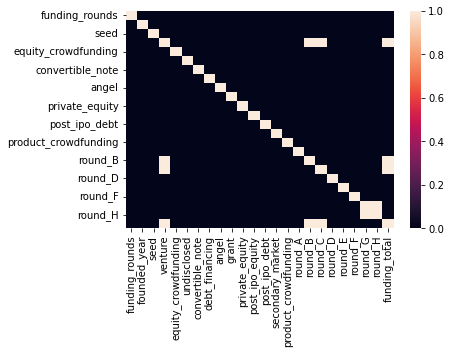

In [327]:
umb= 0.5
sns.heatmap((df_funded_no_outliers.corr() < -umb).astype(int) + (df_funded_no_outliers.corr() > umb).astype(int))

<AxesSubplot:>

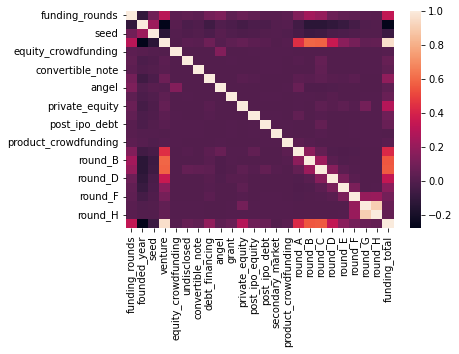

In [328]:
sns.heatmap(df_funded_no_outliers.corr())

# 1. ORIGEN 
## Numero de startups por país



In [329]:
#Number of startups by COUNTRY

#sintaxis para agrupar con aggregate varias columnas: df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
group_country_count = df_funded_no_outliers.groupby('country_code').agg({'name': 'count', 'funding_total': 'sum'})

group_country_count.rename(columns={'name':'startups'}, inplace=True)
group_country_count.sort_values(by='startups', ascending=False, inplace=True)
group_country_count[:20]
group_country_count.reset_index(inplace=True)
group_country_count

country_code  startups  funding_total
0           USA     10963   8.428879e+10
1           GBR       957   5.926667e+09
2           CAN       518   2.842588e+09
3           FRA       387   2.533458e+09
4           ISR       328   2.647206e+09
..          ...       ...            ...
89          MUS         1   2.000000e+05
90          JAM         1   3.200000e+04
91          DZA         1   3.788120e+05
92          SOM         1   2.000000e+06
93          BHS         1   8.900000e+06

[94 rows x 3 columns]

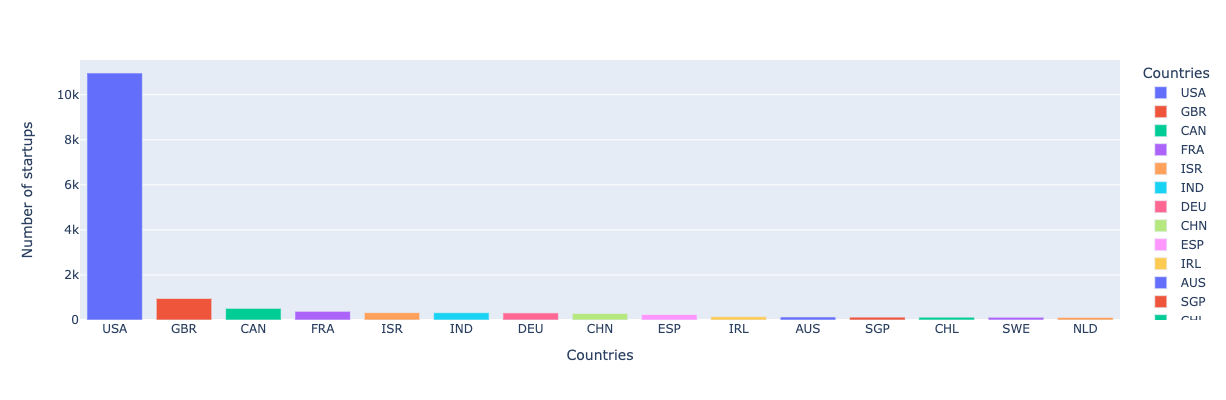

In [330]:
# Acortamos a los 15 países con mayor numero de startups, chart con Plotly
import plotly.express as px
fig1 = px.bar(group_country_count[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of startups'}, height=400)
fig1.show()

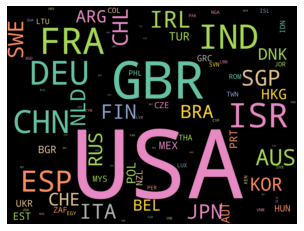

In [331]:
from wordcloud import WordCloud
import re

# Create a list of word
lista = []
text= df_funded_no_outliers['country_code']
for i in text:
    lista.append(i)
#print(str(lista))   

# Create the wordcloud object
wordcloud = WordCloud(width=2000, height=1500, margin=0, random_state=1,
                      background_color='black', colormap='Set2', 
                      collocations=False).generate(" ".join(lista))

# Save image
wordcloud.to_file("wordcloud_countries.png")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [332]:
#PROPORTION of total startups by COUNTRY
prop_country = df_funded_no_outliers['country_code'].value_counts(normalize=True)
print(prop_country[:20])

USA    0.655956
GBR    0.057261
CAN    0.030994
FRA    0.023156
ISR    0.019625
IND    0.019446
DEU    0.018848
CHN    0.017292
ESP    0.014599
IRL    0.008736
AUS    0.008078
SGP    0.007659
CHL    0.007479
SWE    0.007360
NLD    0.006941
ITA    0.006642
FIN    0.006402
JPN    0.006402
RUS    0.005924
KOR    0.005265
Name: country_code, dtype: float64


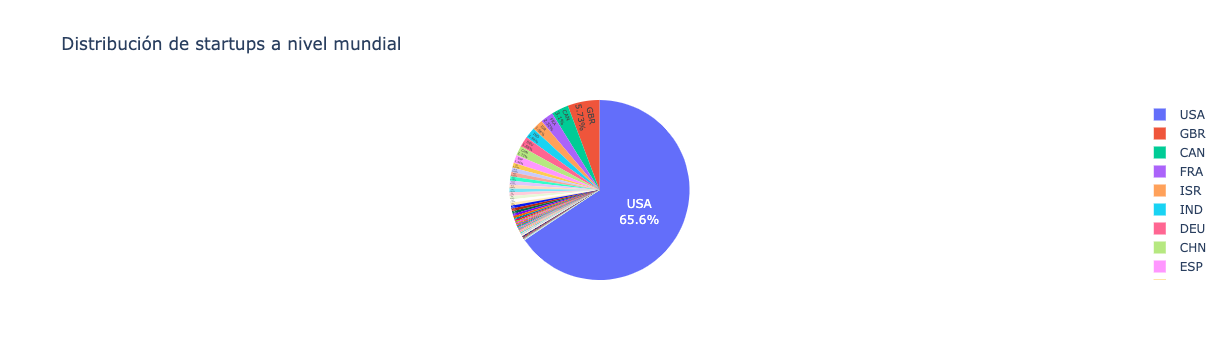

In [333]:


fig = px.pie(group_country_count, values='startups', names='country_code', title='Distribución de startups a nivel mundial')
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Comprobamos el funding medio por startup por país

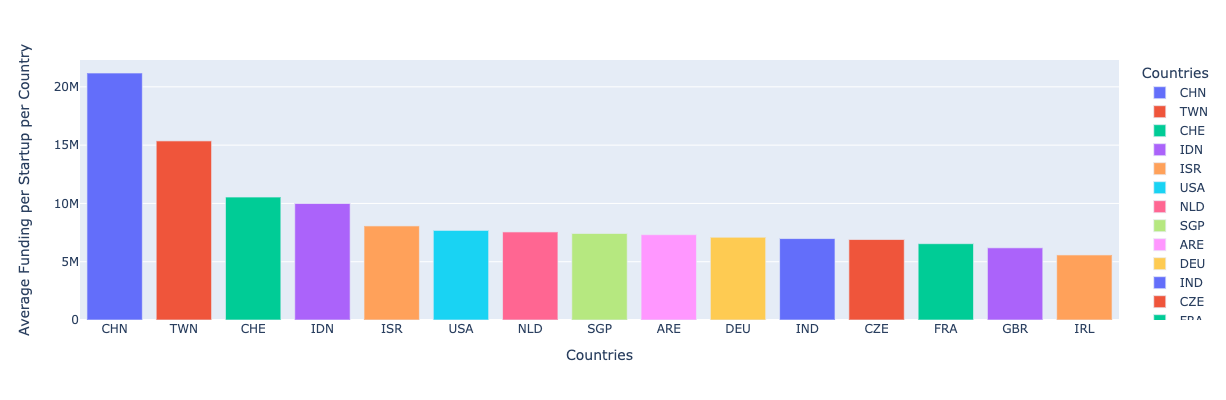

In [334]:

#Anadimos una columna con la media del funding por startup por país
group_country_count['avg_funding_country'] = round(group_country_count['funding_total'] / group_country_count['startups'],0)

group_country_count.sort_values(by='avg_funding_country', ascending=False)
#group_country_count.reset_index(inplace=True)
#del group_country_count['level_0']
#group_country_count.rename(columns={'index': 'pos_num_startups'}, inplace=True)

#solo seleccionamos países con más de 10 startups para elimanr outliers
#bool_num_startups = group_country_count['startups'] >= 10


bool_num_startups = group_country_count[group_country_count['startups'] >= 10]

avg_funding_per_country = bool_num_startups.sort_values(by='avg_funding_country', ascending=False)

#acortamos a los 15 países con mayor funding por startup
fig2 = px.bar(avg_funding_per_country[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig2.show()


## Comprobamos la posición de España en cuanto a número de startups vs funding medio

In [335]:
españa = group_country_count['country_code'] == 'ESP'
group_country_count[españa]
#print('España se encuentra en la ', group_country_count[españa]['pos_num_startups'])


country_code  startups  funding_total  avg_funding_country
8          ESP       244    822160643.0            3369511.0

## Nos centramos en los países de la UE

In [336]:
#sacamos la misma comparativa pero con países de la UE
eu_countries = ['ESP', 'DEU', 'SWE', 'ITA', 'FIN', 'NLD', 'IRL', 'FRA', 'PRT', 'DNK', 'LUX', 'BEL', 'POL', 'AUT', 'BGR', 'EST', 'SVK', 'SVN', 'HUN', 'CYP', 'GRC', 'CZE', 'LTU', 'LVA']

bool_eu_countries = group_country_count['country_code'].isin(eu_countries)


group_eu_countries_startups = group_country_count[bool_eu_countries].sort_values(by='startups', ascending=False)
group_eu_countries_startups

country_code  startups  funding_total  avg_funding_country
3           FRA       387   2.533458e+09            6546403.0
6           DEU       315   2.236942e+09            7101403.0
8           ESP       244   8.221606e+08            3369511.0
9           IRL       146   8.148781e+08            5581357.0
13          SWE       123   6.796420e+08            5525545.0
14          NLD       116   8.764071e+08            7555233.0
15          ITA       111   1.461397e+08            1316574.0
17          FIN       107   4.542406e+08            4245239.0
23          DNK        69   2.704755e+08            3919935.0
24          BEL        63   2.498475e+08            3965834.0
26          POL        40   9.147813e+07            2286953.0
28          AUT        35   1.549475e+08            4427070.0
30          PRT        30   2.894130e+07             964710.0
33          BGR        27   3.625950e+07            1342944.0
34          EST        27   6.821915e+07            2526635.0
36          HUN        21   2.802227e+07            1334394.0
38          GRC        19   1.483751e+07             780921.0
39          CZE        18   1.242649e+08            6903606.0
43          LTU        15   6.164901e+07            4109934.0
50          SVN         9   4.336288e+06             481810.0
51          LUX         8   2.444132e+07            3055164.0
57          SVK         5   1.782200e+06             356440.0
62          LVA         4   5.866636e+06            1466659.0
63          CYP         4   7.934101e+06            1983525.0

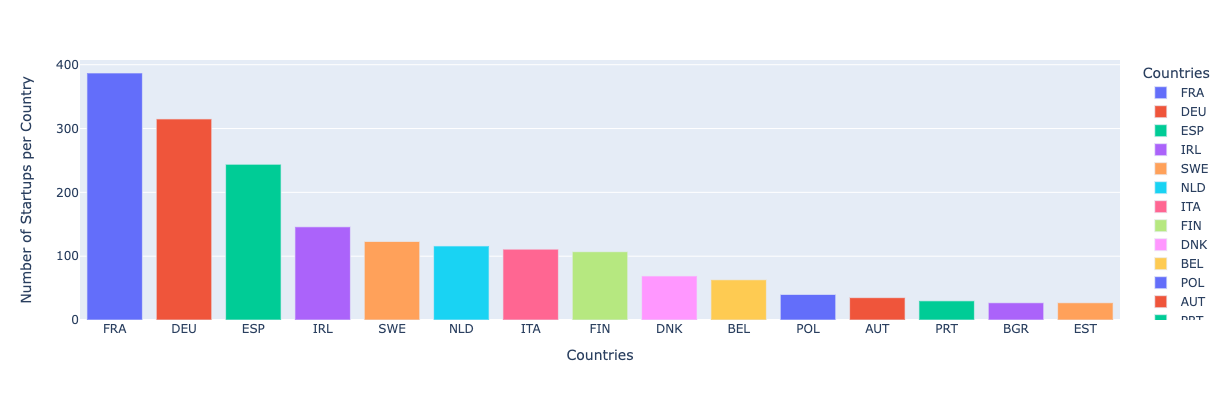

In [337]:
#acortamos a los países EU con mayor numero de startups
fig3 = px.bar(group_eu_countries_startups[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of Startups per Country'}, height=400)
fig3.show()

In [338]:
group_eu_countries_funding = group_country_count[bool_eu_countries].sort_values(by='avg_funding_country', ascending=False)
group_eu_countries_funding

country_code  startups  funding_total  avg_funding_country
14          NLD       116   8.764071e+08            7555233.0
6           DEU       315   2.236942e+09            7101403.0
39          CZE        18   1.242649e+08            6903606.0
3           FRA       387   2.533458e+09            6546403.0
9           IRL       146   8.148781e+08            5581357.0
13          SWE       123   6.796420e+08            5525545.0
28          AUT        35   1.549475e+08            4427070.0
17          FIN       107   4.542406e+08            4245239.0
43          LTU        15   6.164901e+07            4109934.0
24          BEL        63   2.498475e+08            3965834.0
23          DNK        69   2.704755e+08            3919935.0
8           ESP       244   8.221606e+08            3369511.0
51          LUX         8   2.444132e+07            3055164.0
34          EST        27   6.821915e+07            2526635.0
26          POL        40   9.147813e+07            2286953.0
63          CYP         4   7.934101e+06            1983525.0
62          LVA         4   5.866636e+06            1466659.0
33          BGR        27   3.625950e+07            1342944.0
36          HUN        21   2.802227e+07            1334394.0
15          ITA       111   1.461397e+08            1316574.0
30          PRT        30   2.894130e+07             964710.0
38          GRC        19   1.483751e+07             780921.0
50          SVN         9   4.336288e+06             481810.0
57          SVK         5   1.782200e+06             356440.0

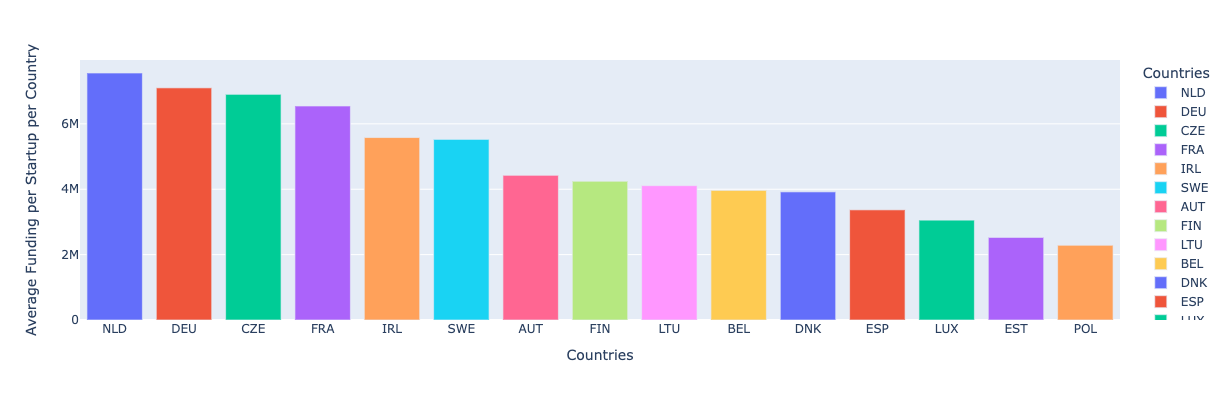

In [339]:
#acortamos a los países EU con mayor funding por startups
fig4 = px.bar(group_eu_countries_funding[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig4.show()

## Comprobamos los datos a nivel europeo total

In [340]:
#sacamos la misma comparativa pero con países de Europa
europe_all = ['RUS', 'GBR', 'CHE', 'ISR', 'TUR', 'NOR', 'ESP', 'DEU', 'SWE', 'ITA', 'FIN', 'NLD', 'IRL', 'FRA', 'PRT', 'DNK', 'CHE', 'BEL', 'POL', 'AUT', 'BGR', 'EST', 'SVK', 'SVN', 'HUN', 'CYP', 'GRC', 'CZE', 'LTU', 'LVA']

#Anadimos una columna con la media del funding por startup por país
group_country_count['avg_funding_country'] = round(group_country_count['funding_total'] / group_country_count['startups'],0)


bool_european_countries = group_country_count['country_code'].isin(europe_all)


group_european_all_startups = group_country_count[bool_european_countries].sort_values(by='startups', ascending=False)
group_european_all_startups

country_code  startups  funding_total  avg_funding_country
1           GBR       957   5.926667e+09            6192965.0
3           FRA       387   2.533458e+09            6546403.0
4           ISR       328   2.647206e+09            8070749.0
6           DEU       315   2.236942e+09            7101403.0
8           ESP       244   8.221606e+08            3369511.0
9           IRL       146   8.148781e+08            5581357.0
13          SWE       123   6.796420e+08            5525545.0
14          NLD       116   8.764071e+08            7555233.0
15          ITA       111   1.461397e+08            1316574.0
17          FIN       107   4.542406e+08            4245239.0
18          RUS        99   5.367232e+08            5421447.0
21          CHE        83   8.755594e+08           10548908.0
23          DNK        69   2.704755e+08            3919935.0
24          BEL        63   2.498475e+08            3965834.0
26          POL        40   9.147813e+07            2286953.0
27          TUR        35   1.614306e+08            4612303.0
28          AUT        35   1.549475e+08            4427070.0
29          NOR        33   1.192594e+08            3613922.0
30          PRT        30   2.894130e+07             964710.0
33          BGR        27   3.625950e+07            1342944.0
34          EST        27   6.821915e+07            2526635.0
36          HUN        21   2.802227e+07            1334394.0
38          GRC        19   1.483751e+07             780921.0
39          CZE        18   1.242649e+08            6903606.0
43          LTU        15   6.164901e+07            4109934.0
50          SVN         9   4.336288e+06             481810.0
57          SVK         5   1.782200e+06             356440.0
62          LVA         4   5.866636e+06            1466659.0
63          CYP         4   7.934101e+06            1983525.0

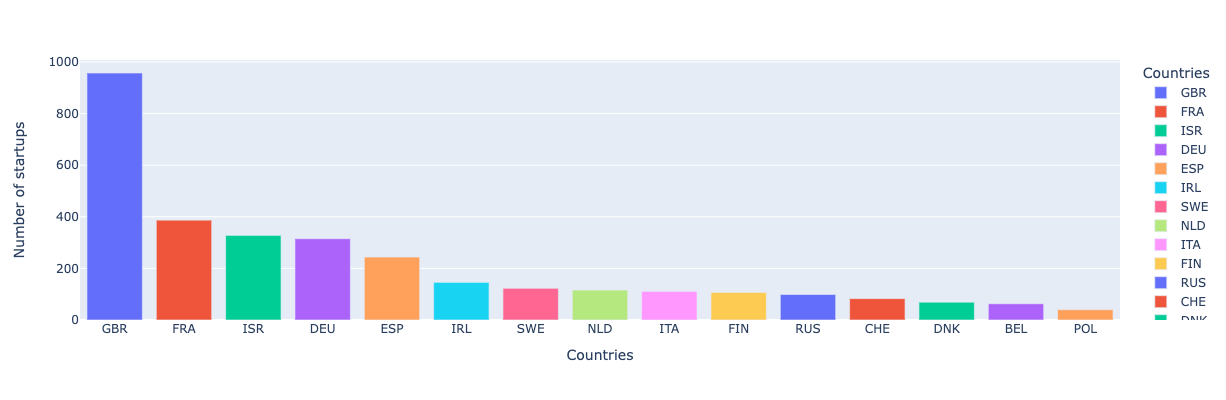

In [341]:
#acortamos a los países Europe_all con mayor numero de startups
fig = px.bar(group_european_all_startups[:15], x='country_code', y='startups',
            color='country_code',
             labels={'country_code': 'Countries', 'startups':'Number of startups'}, height=400)
fig.show()

In [342]:
group_european_all_funding = group_country_count[bool_european_countries].sort_values(by='avg_funding_country', ascending=False)
group_european_all_funding

country_code  startups  funding_total  avg_funding_country
21          CHE        83   8.755594e+08           10548908.0
4           ISR       328   2.647206e+09            8070749.0
14          NLD       116   8.764071e+08            7555233.0
6           DEU       315   2.236942e+09            7101403.0
39          CZE        18   1.242649e+08            6903606.0
3           FRA       387   2.533458e+09            6546403.0
1           GBR       957   5.926667e+09            6192965.0
9           IRL       146   8.148781e+08            5581357.0
13          SWE       123   6.796420e+08            5525545.0
18          RUS        99   5.367232e+08            5421447.0
27          TUR        35   1.614306e+08            4612303.0
28          AUT        35   1.549475e+08            4427070.0
17          FIN       107   4.542406e+08            4245239.0
43          LTU        15   6.164901e+07            4109934.0
24          BEL        63   2.498475e+08            3965834.0
23          DNK        69   2.704755e+08            3919935.0
29          NOR        33   1.192594e+08            3613922.0
8           ESP       244   8.221606e+08            3369511.0
34          EST        27   6.821915e+07            2526635.0
26          POL        40   9.147813e+07            2286953.0
63          CYP         4   7.934101e+06            1983525.0
62          LVA         4   5.866636e+06            1466659.0
33          BGR        27   3.625950e+07            1342944.0
36          HUN        21   2.802227e+07            1334394.0
15          ITA       111   1.461397e+08            1316574.0
30          PRT        30   2.894130e+07             964710.0
38          GRC        19   1.483751e+07             780921.0
50          SVN         9   4.336288e+06             481810.0
57          SVK         5   1.782200e+06             356440.0

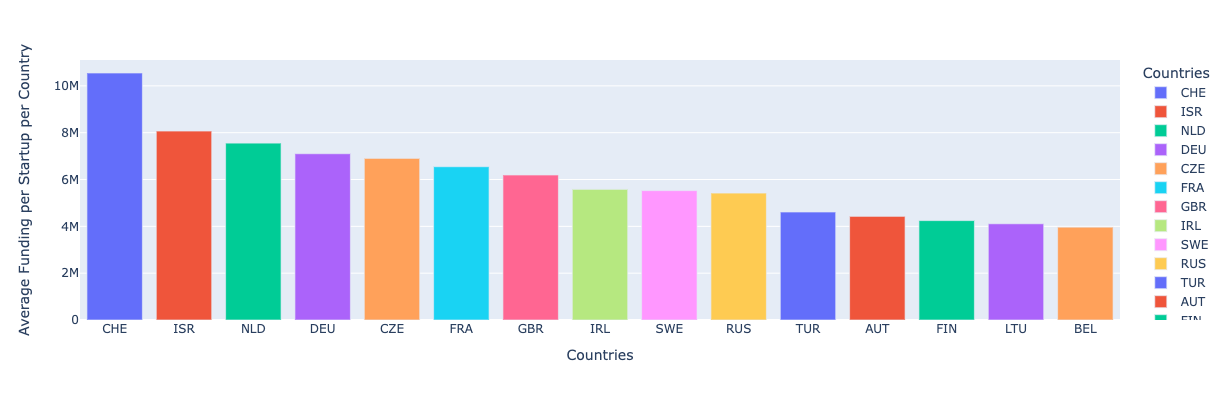

In [343]:
#acortamos a los países Europe_all con mayor numero de startups
fig5 = px.bar(group_european_all_funding[:15], x='country_code', y='avg_funding_country',
            color='country_code',
             labels={'country_code': 'Countries', 'avg_funding_country':'Average Funding per Startup per Country'}, height=400)
fig5.show()

In [344]:
#Sacamos diferentes rangos según el número de startups
group_country_count['Startup-Range'] = pd.cut(x=group_country_count['startups'], bins=[0,50,200,1000,15000])
group_country_count[:20]

country_code  startups  funding_total  avg_funding_country  Startup-Range
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]
5           IND       325   2.270296e+09            6985527.0    (200, 1000]
6           DEU       315   2.236942e+09            7101403.0    (200, 1000]
7           CHN       289   6.123163e+09           21187414.0    (200, 1000]
8           ESP       244   8.221606e+08            3369511.0    (200, 1000]
9           IRL       146   8.148781e+08            5581357.0      (50, 200]
10          AUS       135   5.185831e+08            3841356.0      (50, 200]
11          SGP       128   9.503248e+08            7424412.0      (50, 200]
12          CHL       125   3.816797e+07             305344.0      (50, 200]
13          SWE       123   6.796420e+08            5525545.0      (50, 200]
14          NLD       116   8.764071e+08            7555233.0      (50, 200]
15          ITA       111   1.461397e+08            1316574.0      (50, 200]
16          JPN       107   5.746151e+08            5370234.0      (50, 200]
17          FIN       107   4.542406e+08            4245239.0      (50, 200]
18          RUS        99   5.367232e+08            5421447.0      (50, 200]
19          BRA        88   2.341761e+08            2661092.0      (50, 200]

In [345]:
group_country_count.sort_values(by='startups', ascending= False, inplace=True)

group_country_count['percentage'] = (group_country_count['startups'] / group_country_count['startups'].sum()) *100


group_country_count

country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
..          ...       ...            ...                  ...            ...   
81          ARM         1   2.651750e+07           26517500.0        (0, 50]   
80          UZB         1   9.000000e+04              90000.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   
78          MLT         1   4.294200e+05             429420.0        (0, 50]   
93          BHS         1   8.900000e+06            8900000.0        (0, 50]   

    percentage  
0    65.595644  
1     5.726081  
2     3.099384  
3     2.315563  
4     1.962544  
..         ...  
81    0.005983  
80    0.005983  
79    0.005983  
78    0.005983  
93    0.005983  

[94 rows x 6 columns]

# 2. INDUSTRY
## Dónde hay mas startups por industria

In [346]:
group_industry = pd.DataFrame(df_funded_no_outliers.groupby(' market ')['name'].count())

group_industry.rename(columns={'name':'startups'}, inplace=True)

group_industry.sort_values(by='startups', ascending=False, inplace=True)
group_industry

startups
 market                             
 Software                       1836
 Biotechnology                  1155
 Mobile                          806
 E-Commerce                      647
 Curated Web                     634
...                              ...
 Golf Equipment                    1
 Sex                               1
 Genetic Testing                   1
 General Public Worldwide          1
 Lingerie                          1

[638 rows x 1 columns]

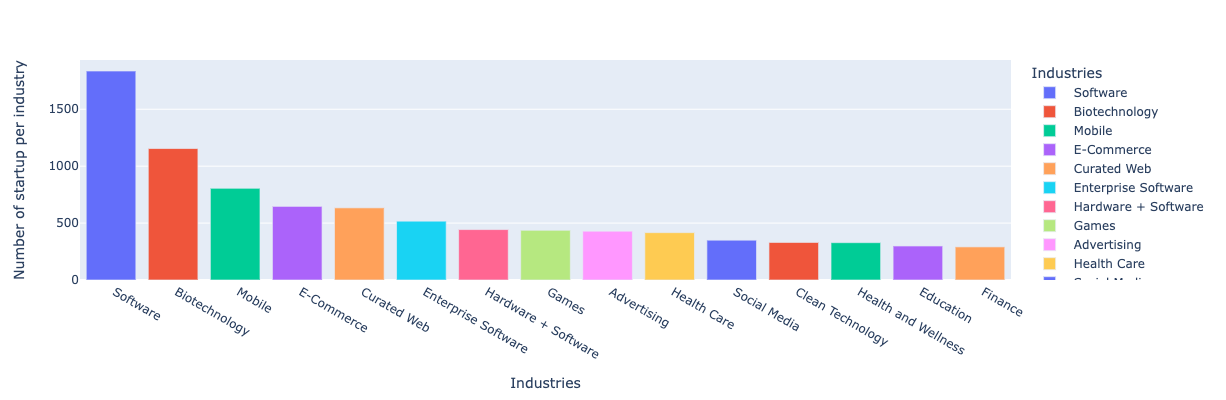

In [347]:
#Number of startups per industry

#Already reset index
stratups_per_industry = group_industry.reset_index()

fig6 = px.bar(stratups_per_industry[:15], x=' market ', y='startups',
            color=' market ',
             labels={' market ': 'Industries', 'startups':'Number of startup per industry'}, height=400)
fig6.show()



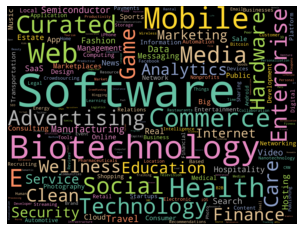

In [348]:
# Create a list of word
lista2 = []
text= df_funded_no_outliers[' market ']
for i in text:
    lista2.append(i)
#print(str(lista))   

# Create the wordcloud object
wordcloud_industries = WordCloud(width=2000, height=1500, margin=0, random_state=1,
                      background_color='black', colormap='Set2', 
                      collocations=False).generate(" ".join(lista2))

# Save image
wordcloud_industries.to_file("wordcloud_industries.png")

# Display the generated image:
plt.imshow(wordcloud_industries, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [349]:
more_than_50 = group_industry['startups'] > 50
group_industry_top = group_industry[more_than_50]
group_industry_top

startups
 market                         
 Software                   1836
 Biotechnology              1155
 Mobile                      806
 E-Commerce                  647
 Curated Web                 634
 Enterprise Software         517
 Hardware + Software         443
 Games                       437
 Advertising                 429
 Health Care                 416
 Social Media                350
 Clean Technology            330
 Health and Wellness         328
 Education                   299
 Finance                     291
 Analytics                   267
 Security                    205
 Manufacturing               174
 Semiconductors              152
 Web Hosting                 139
 Travel                      137
 Fashion                     130
 Hospitality                 123
 Messaging                   120
 SaaS                        118
 News                        115
 Real Estate                 104
 Music                        99
 Search                       95
 Internet                     94
 Marketplaces                 94
 Consulting                   93
 Apps                         89
 Technology                   88
 Sports                       85
 Photography                  80
 Video                        76
 Big Data                     70
 Social Network Media         68
 Startups                     65
 Cloud Computing              64
 Networking                   61
 Sales and Marketing          60
 Design                       59
 Entertainment                58
 Automotive                   55
 Web Development              54

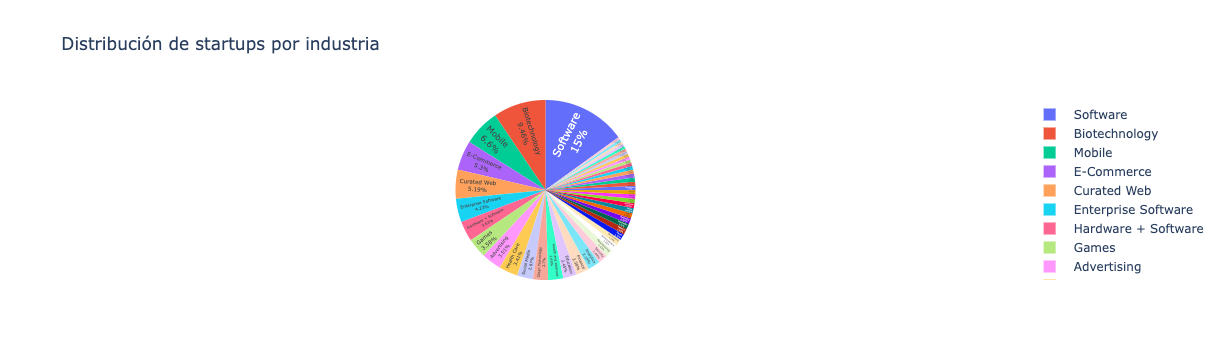

In [350]:
#Pie chart con Plotly

fig = px.pie(group_industry_top, values='startups', names=group_industry_top.index, title='Distribución de startups por industria')
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Calcular el average funding per startup per industry

In [351]:

group_industry['funding_total'] = round(df_funded_no_outliers.groupby(' market ')['funding_total'].sum(),2)

group_industry['avg_funding_industry'] = round(group_industry['funding_total'] / group_industry['startups'])


more_than_50  = group_industry[group_industry['startups'] > 50]


group_industry_top = more_than_50.sort_values(by='avg_funding_industry', ascending=False)


group_industry_top[:10]


startups  funding_total  avg_funding_industry
 market                                                             
 Semiconductors             152   2.601223e+09            17113311.0
 Web Hosting                139   1.946923e+09            14006643.0
 Clean Technology           330   4.564236e+09            13831018.0
 Health Care                416   5.524738e+09            13280621.0
 Entertainment               58   7.351091e+08            12674294.0
 Biotechnology             1155   1.448174e+10            12538307.0
 Technology                  88   9.883769e+08            11231556.0
 Finance                    291   2.588297e+09             8894490.0
 Enterprise Software        517   4.530356e+09             8762778.0
 Automotive                  55   4.743313e+08             8624206.0

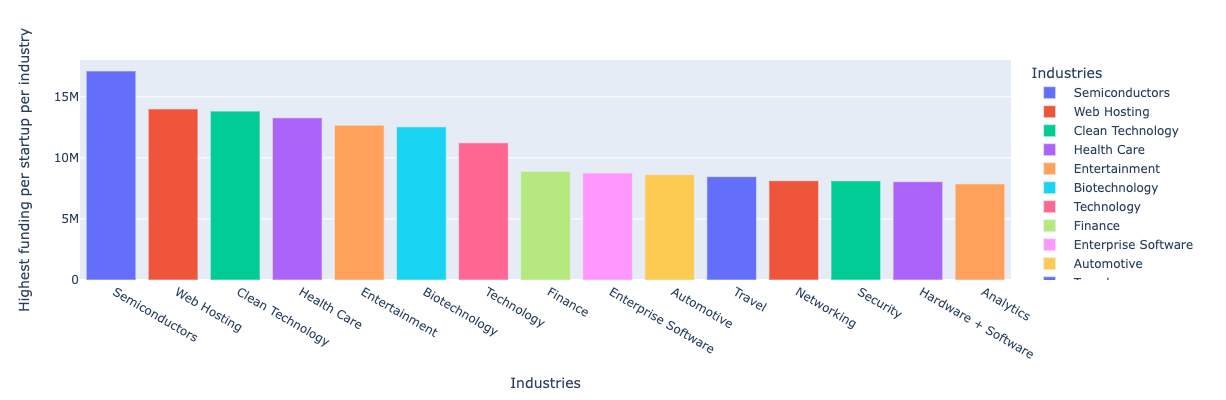

In [352]:
funding_per_industry = group_industry_top.reset_index()
fig7 = px.bar(funding_per_industry[:15], x=' market ', y='avg_funding_industry',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_industry':'Highest funding per startup per industry'}, height=400)
fig7.show()

## Calcular el average funding rounds per industry

In [353]:

group_industry_rounds = df_funded_no_outliers.groupby(' market ').agg({'name': 'count', 'funding_rounds': 'sum'})

group_industry_rounds.rename(columns={'name':'startups'}, inplace=True)

group_industry_rounds['avg_funding_rounds'] = round(group_industry_rounds['funding_rounds'] / group_industry_rounds['startups'],2)

rounds_more_than_50  = group_industry_rounds[group_industry_rounds['startups'] > 50]

rounds_group_industry_top = rounds_more_than_50.sort_values(by='avg_funding_rounds', ascending=False)
rounds_group_industry_top[:10]

startups  funding_rounds  avg_funding_rounds
 market                                                            
 Big Data                    70           129.0                1.84
 Semiconductors             152           269.0                1.77
 Health Care                416           724.0                1.74
 SaaS                       118           205.0                1.74
 Entertainment               58            99.0                1.71
 Biotechnology             1155          1960.0                1.70
 Enterprise Software        517           877.0                1.70
 Security                   205           347.0                1.69
 Finance                    291           493.0                1.69
 Automotive                  55            92.0                1.67

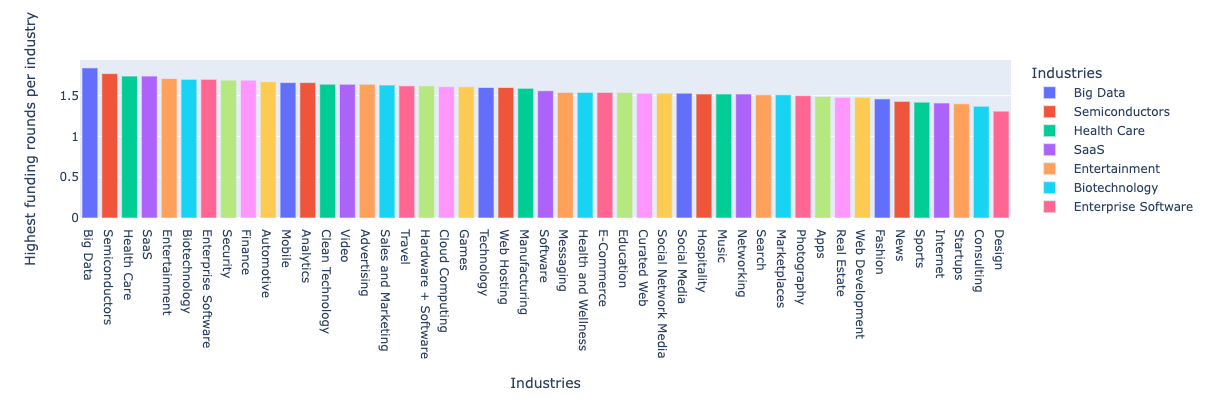

amin    1.310000
amax    1.840000
mean    1.574681
Name: avg_funding_rounds, dtype: float64


In [354]:
funding_rounds_per_industry = rounds_group_industry_top.reset_index()
#print(funding_rounds_per_industry['avg_funding_rounds'].agg([np.min, np.max,np.mean])
#df_funded[['seed', 'venture', 'funding_total']].agg([iqr, np.median]))

fig8 = px.bar(funding_rounds_per_industry, x=' market ', y='avg_funding_rounds',
            color=' market ',
             labels={' market ': 'Industries', 'avg_funding_rounds':'Highest funding rounds per industry'}, height=400)
fig8.show()

print(funding_rounds_per_industry['avg_funding_rounds'].agg([np.min, np.max,np.mean]))

# 3. TIMING. 
### Crecimiento de la inversión en fase seed a través de los años

In [355]:
#Average seed by founded_year
group_year_avg_funding = df_funded_no_outliers.groupby('founded_year')[['seed','venture','funding_total']].mean() 

group_year_avg_funding['seed'] = round(group_year_avg_funding['seed'],0)
group_year_avg_funding['venture'] = round(group_year_avg_funding['venture'],0)
group_year_avg_funding['funding_total'] = round(group_year_avg_funding['funding_total'],0)
group_year_avg_funding['startups'] = df_clean.groupby('founded_year')['name'].count()

#group_year_avg_funding.sort_values(by='seed', ascending=False, inplace=True)
group_year_avg_funding

seed     venture  funding_total  startups
founded_year                                               
2000.0         63145.0  15109190.0     16093238.0       734
2001.0        107406.0  14017006.0     15499221.0       625
2002.0         58192.0  13206846.0     13963673.0       658
2003.0         53601.0  14195382.0     15308696.0       813
2004.0         91600.0  13931579.0     15445396.0      1001
2005.0        134108.0  10865186.0     12094214.0      1231
2006.0        165395.0   9991705.0     10731740.0      1583
2007.0        219677.0   8207548.0      9109237.0      2036
2008.0        249652.0   7034181.0      7797628.0      2027
2009.0        291587.0   5635984.0      6135594.0      2507
2010.0        431178.0   4880742.0      5606768.0      3100
2011.0        526051.0   3883471.0      4580518.0      4032
2012.0        587956.0   2797650.0      3516361.0      4110
2013.0        565375.0   2120297.0      2751526.0      2953
2014.0        636127.0   1282405.0      2000977.0       853

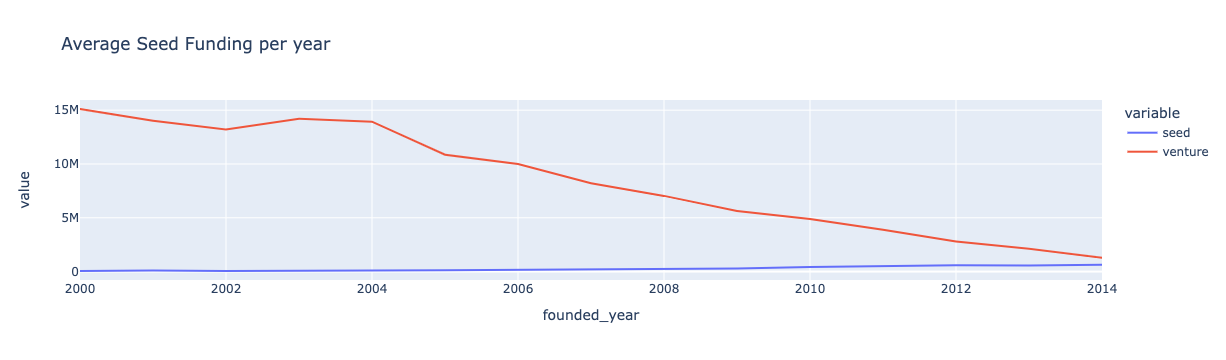

In [356]:
fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, y=["seed", 'venture'], title='Average Seed Funding per year')
fig9.show()

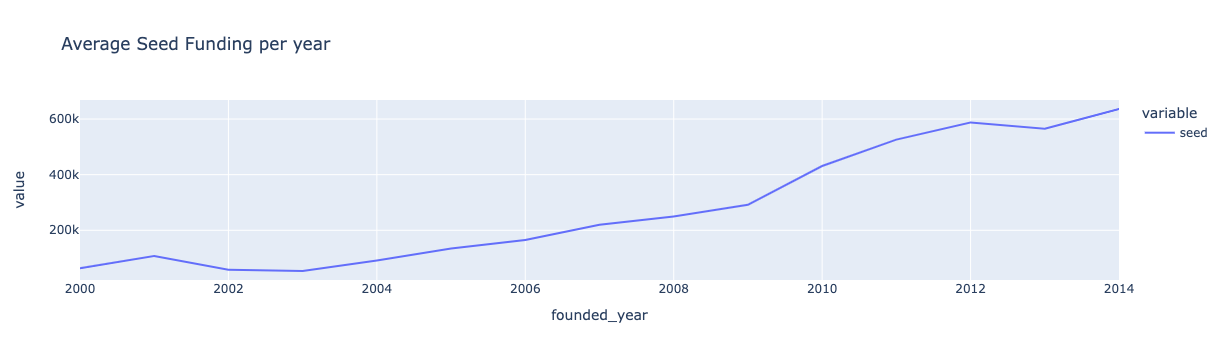

In [357]:
fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, y=["seed"], title='Average Seed Funding per year')
fig9.show()

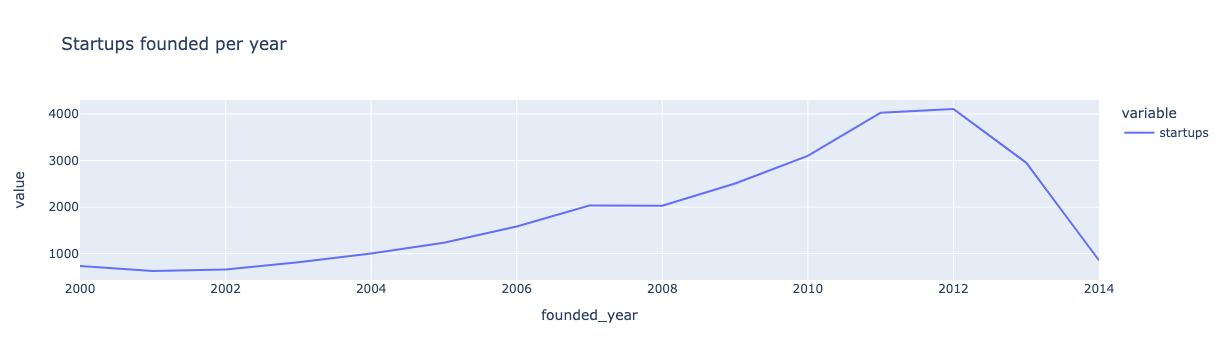

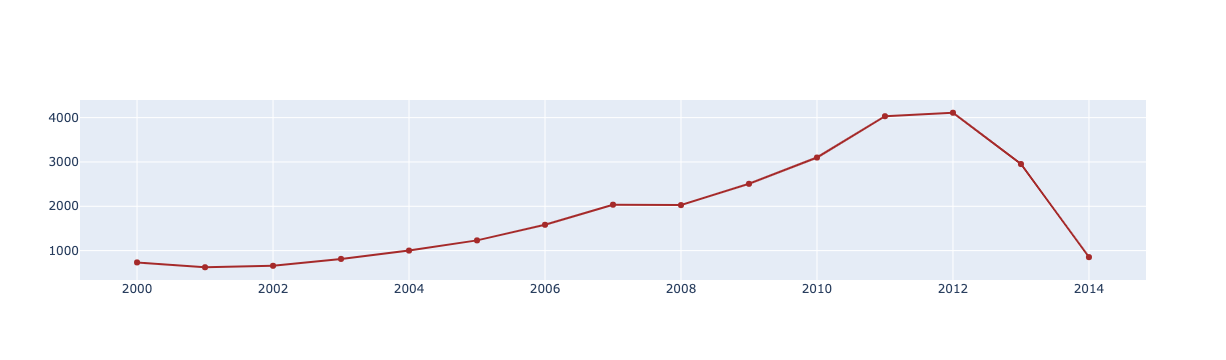

In [358]:
import plotly.graph_objs as go

fig9 = px.line(group_year_avg_funding, x=group_year_avg_funding.index, 
               y=['startups'],title='Startups founded per year')


fig11 = go.Figure(data=go.Scatter(x=group_year_avg_funding.index, 
                                y=group_year_avg_funding.startups, 
                                 mode='lines+markers', line_color='#A52A2A'))

fig9.show()
fig11.show()

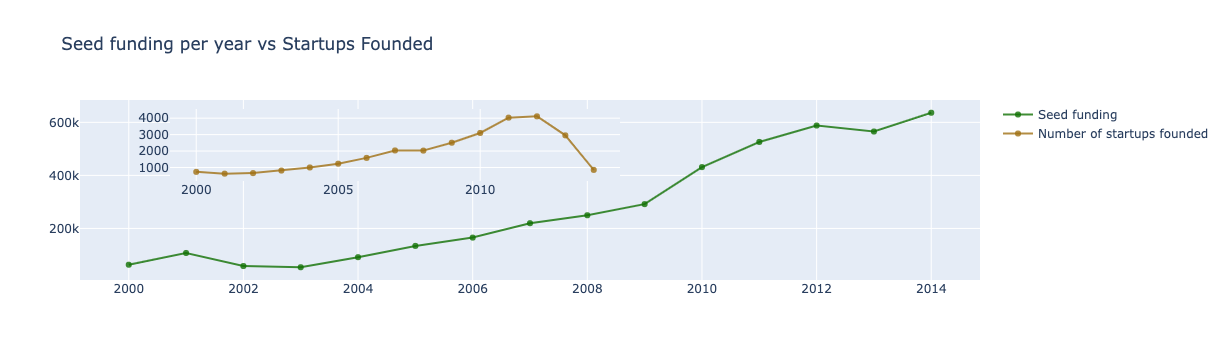

In [359]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# first line plot
trace1 = go.Scatter(
    x=group_year_avg_funding.index,
    y=group_year_avg_funding.seed,
    name = "Seed funding",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# second line plot
trace2 = go.Scatter(
    x=group_year_avg_funding.index,
    y=group_year_avg_funding.startups,
    xaxis='x2',
    yaxis='y2',
    name = "Number of startups founded",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.1, 0.6],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.55, 0.95],
        anchor='x2',
    ),
    title = 'Seed funding per year vs Startups Founded'

)

fig10 = go.Figure(data=data, layout=layout)
iplot(fig10)


## Mayor periordo entre founded y last_funded significa mas funding_total

In [360]:
df_funded_no_outliers['from_founded_to_last_funding'] = df_funded_no_outliers['from_founding_to_funding'] + df_funded_no_outliers['from_first_to_last_funding']
df_funded_no_outliers.head()

permalink               name  \
0            /organization/waywire           #waywire   
3   /organization/in-touch-network  (In)Touch Network   
10       /organization/1-2-3-listo        1,2,3 Listo   
15   /organization/10-minutes-with    10 Minutes With   
17        /organization/1000-corks         1000 Corks   

                     homepage_url  \
0          http://www.waywire.com   
3   http://www.InTouchNetwork.com   
10        http://www.123listo.com   
15       http://10minuteswith.com   
17           http://1000corks.com   

                                        category_list        market   \
0          |Entertainment|Politics|Social Media|News|          News    
3   |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
10                                       |E-Commerce|    E-Commerce    
15                                        |Education|     Education    
17                                           |Search|        Search    

    funding_total_usd      status country_code state_code            region  \
0           17,50,000    acquired          USA         NY     New York City   
3           15,00,000   operating          GBR        NaN            London   
10             40,000   operating          CHL        NaN          Santiago   
15          44,00,000   operating          GBR        NaN            London   
17             40,000   operating          USA         OR  Portland, Oregon   

    ... round_C  round_D round_E round_F round_G  round_H funding_total  \
0   ...     0.0      0.0     0.0     0.0     0.0      0.0     1750000.0   
3   ...     0.0      0.0     0.0     0.0     0.0      0.0     1500000.0   
10  ...     0.0      0.0     0.0     0.0     0.0      0.0       40000.0   
15  ...     0.0      0.0     0.0     0.0     0.0      0.0     4400000.0   
17  ...     0.0      0.0     0.0     0.0     0.0      0.0       40000.0   

   from_first_to_last_funding  from_founding_to_funding  \
0                      0 days                   29 days   
3                      0 days                    0 days   
10                     0 days                  414 days   
15                   646 days                    0 days   
17                     0 days                 1330 days   

    from_founded_to_last_funding  
0                        29 days  
3                         0 days  
10                      414 days  
15                      646 days  
17                     1330 days  

[5 rows x 43 columns]

In [361]:
df_funded_no_outliers['from_founded_to_last_funding'].max()

Timedelta('5430 days 00:00:00')

In [362]:
#Comprobamos si las 3 columnas se han transformado al formato datetime64
df_funded_no_outliers.dtypes

permalink                                object
name                                     object
homepage_url                             object
category_list                            object
 market                                  object
 funding_total_usd                       object
status                                   object
country_code                             object
state_code                               object
region                                   object
city                                     object
funding_rounds                          float64
founded_at                       datetime64[ns]
founded_month                            object
founded_quarter                          object
founded_year                            float64
first_funding_at                 datetime64[ns]
last_funding_at                  datetime64[ns]
seed                                    float64
venture                                 float64
equity_crowdfunding                     

In [363]:
#calculamos el incremento del funding segun el numero de días desde el founding al ultimo funding

group_time = df_funded_no_outliers.groupby('from_founded_to_last_funding')[['funding_total','from_founded_to_last_funding']].mean()
group_time.sort_values(by='from_founded_to_last_funding', ascending=False, inplace=True)

#Sacamos diferentes rangos según el número de días from founded to last funding
group_time['Days-Range'] = pd.cut(x=group_time.index, 
                                  bins=pd.to_timedelta(
                                      ['0 days', '365 days','730 days','1095 days',
                                       '1460 days','1825 days','2190 days', '2555 days', 
                                       '2920 days', '3285 days','3650 days', '4015 days', 
                                       '4380 days', '4745 days', '5110 days','5475 days',
                                       ]))


group_time = group_time.groupby('Days-Range')['funding_total'].mean()
group_time = pd.DataFrame(data=group_time)
group_time.reset_index(inplace=True)

group_time

Days-Range  funding_total
0       (0 days 00:00:00, 365 days 00:00:00]   1.839767e+06
1     (365 days 00:00:00, 730 days 00:00:00]   3.907643e+06
2    (730 days 00:00:00, 1095 days 00:00:00]   5.889554e+06
3   (1095 days 00:00:00, 1460 days 00:00:00]   8.417042e+06
4   (1460 days 00:00:00, 1825 days 00:00:00]   1.032760e+07
5   (1825 days 00:00:00, 2190 days 00:00:00]   1.193801e+07
6   (2190 days 00:00:00, 2555 days 00:00:00]   1.423990e+07
7   (2555 days 00:00:00, 2920 days 00:00:00]   1.559076e+07
8   (2920 days 00:00:00, 3285 days 00:00:00]   1.575735e+07
9   (3285 days 00:00:00, 3650 days 00:00:00]   1.816648e+07
10  (3650 days 00:00:00, 4015 days 00:00:00]   1.979422e+07
11  (4015 days 00:00:00, 4380 days 00:00:00]   1.601332e+07
12  (4380 days 00:00:00, 4745 days 00:00:00]   1.714505e+07
13  (4745 days 00:00:00, 5110 days 00:00:00]   1.707229e+07
14  (5110 days 00:00:00, 5475 days 00:00:00]   1.764084e+07

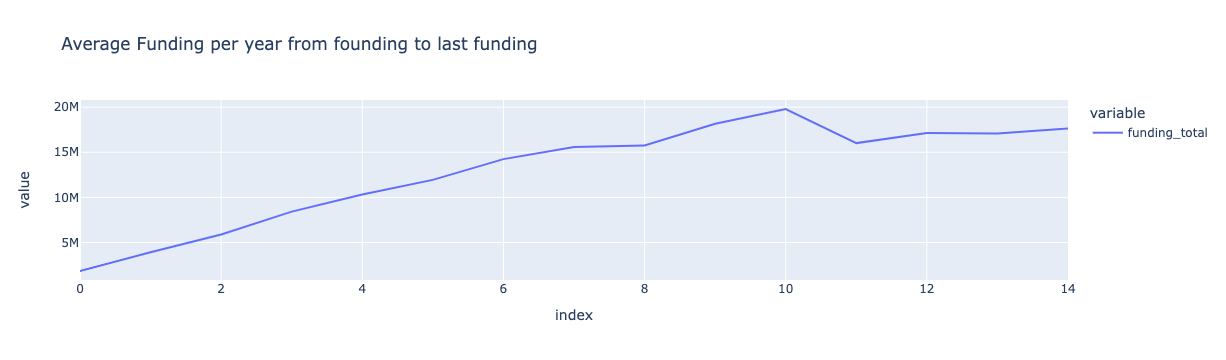

In [364]:

fig13 = px.line(group_time, x=group_time.index, y=['funding_total'], 
                title='Average Funding per year from founding to last funding')
fig13.show()


## Mathematical Expectation
### 1. Por tipo de industria

In [365]:
total_startups = group_industry['startups'].sum()
print('Numero total de startups con funding: ', total_startups)
group_industry['startups_percentage'] = (group_industry['startups'] / total_startups) * 100
group_industry['expected_in_top'] = round(((group_industry['startups_percentage'] * 1000)/ 100) ,0)
#group_industry.reset_index(inplace=True)

group_industry

Numero total de startups con funding:  16713


startups  funding_total  avg_funding_industry  \
 market                                                                     
 Software                       1836   1.108046e+10             6035108.0   
 Biotechnology                  1155   1.448174e+10            12538307.0   
 Mobile                          806   4.869042e+09             6040995.0   
 E-Commerce                      647   4.272759e+09             6603955.0   
 Curated Web                     634   2.364739e+09             3729873.0   
...                              ...            ...                   ...   
 Golf Equipment                    1   4.500000e+05              450000.0   
 Sex                               1   4.800000e+06             4800000.0   
 Genetic Testing                   1   1.000000e+06             1000000.0   
 General Public Worldwide          1   6.000000e+05              600000.0   
 Lingerie                          1   2.000000e+07            20000000.0   

                            startups_percentage  expected_in_top  
 market                                                           
 Software                             10.985460            110.0  
 Biotechnology                         6.910788             69.0  
 Mobile                                4.822593             48.0  
 E-Commerce                            3.871238             39.0  
 Curated Web                           3.793454             38.0  
...                                         ...              ...  
 Golf Equipment                        0.005983              0.0  
 Sex                                   0.005983              0.0  
 Genetic Testing                       0.005983              0.0  
 General Public Worldwide              0.005983              0.0  
 Lingerie                              0.005983              0.0  

[638 rows x 5 columns]

In [366]:
df_funded_no_outliers.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000 = df_funded_no_outliers[:1000]

top_1000 = top_1000.groupby(' market ')['name'].count()
top_1000.sort_values(ascending=False, inplace=True)
top_1000 = pd.DataFrame(data=top_1000)
top_1000.reset_index(inplace=True)
top_1000

market   name
0             Biotechnology    157
1                  Software     80
2               Health Care     63
3          Clean Technology     43
4       Enterprise Software     42
..                       ...   ...
177        Mobile Analytics      1
178        Data Integration      1
179               Databases      1
180   Medical Professionals      1
181              Accounting      1

[182 rows x 2 columns]

In [367]:
join_industry_top = group_industry.join(top_1000.set_index(' market '), on=' market ')

join_industry_top.rename(columns={'name':'startups_top'}, inplace=True)

join_industry_top.reset_index(inplace=True)
join_industry_top

market   startups  funding_total  \
0                     Software       1836   1.108046e+10   
1                Biotechnology       1155   1.448174e+10   
2                       Mobile        806   4.869042e+09   
3                   E-Commerce        647   4.272759e+09   
4                  Curated Web        634   2.364739e+09   
..                          ...       ...            ...   
633             Golf Equipment          1   4.500000e+05   
634                        Sex          1   4.800000e+06   
635            Genetic Testing          1   1.000000e+06   
636   General Public Worldwide          1   6.000000e+05   
637                   Lingerie          1   2.000000e+07   

     avg_funding_industry  startups_percentage  expected_in_top  startups_top  
0               6035108.0            10.985460            110.0          80.0  
1              12538307.0             6.910788             69.0         157.0  
2               6040995.0             4.822593             48.0          37.0  
3               6603955.0             3.871238             39.0          38.0  
4               3729873.0             3.793454             38.0           9.0  
..                    ...                  ...              ...           ...  
633              450000.0             0.005983              0.0           NaN  
634             4800000.0             0.005983              0.0           NaN  
635             1000000.0             0.005983              0.0           NaN  
636              600000.0             0.005983              0.0           NaN  
637            20000000.0             0.005983              0.0           NaN  

[638 rows x 7 columns]

In [368]:
join_industry_top = join_industry_top.dropna()
join_industry_top

market   startups  funding_total  \
0                       Software       1836   1.108046e+10   
1                  Biotechnology       1155   1.448174e+10   
2                         Mobile        806   4.869042e+09   
3                     E-Commerce        647   4.272759e+09   
4                    Curated Web        634   2.364739e+09   
..                            ...       ...            ...   
549   Data Center Infrastructure          1   4.280000e+07   
555                     Lighting          1   1.016000e+08   
587                       Motors          1   3.020000e+07   
609        Enterprise Purchasing          1   3.130000e+07   
612                 Space Travel          1   3.750000e+07   

     avg_funding_industry  startups_percentage  expected_in_top  startups_top  
0               6035108.0            10.985460            110.0          80.0  
1              12538307.0             6.910788             69.0         157.0  
2               6040995.0             4.822593             48.0          37.0  
3               6603955.0             3.871238             39.0          38.0  
4               3729873.0             3.793454             38.0           9.0  
..                    ...                  ...              ...           ...  
549            42800000.0             0.005983              0.0           1.0  
555           101600000.0             0.005983              0.0           1.0  
587            30200000.0             0.005983              0.0           1.0  
609            31300000.0             0.005983              0.0           1.0  
612            37500000.0             0.005983              0.0           1.0  

[182 rows x 7 columns]

In [369]:
join_industry_top['math_expectation'] = ((join_industry_top['startups_top'] - join_industry_top['expected_in_top']) / join_industry_top['expected_in_top'])*100
join_industry_top

/var/folders/sy/nxmnw_wj4_v63snpccyy_vjc0000gn/T/ipykernel_10303/2781690488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



market   startups  funding_total  \
0                       Software       1836   1.108046e+10   
1                  Biotechnology       1155   1.448174e+10   
2                         Mobile        806   4.869042e+09   
3                     E-Commerce        647   4.272759e+09   
4                    Curated Web        634   2.364739e+09   
..                            ...       ...            ...   
549   Data Center Infrastructure          1   4.280000e+07   
555                     Lighting          1   1.016000e+08   
587                       Motors          1   3.020000e+07   
609        Enterprise Purchasing          1   3.130000e+07   
612                 Space Travel          1   3.750000e+07   

     avg_funding_industry  startups_percentage  expected_in_top  startups_top  \
0               6035108.0            10.985460            110.0          80.0   
1              12538307.0             6.910788             69.0         157.0   
2               6040995.0             4.822593             48.0          37.0   
3               6603955.0             3.871238             39.0          38.0   
4               3729873.0             3.793454             38.0           9.0   
..                    ...                  ...              ...           ...   
549            42800000.0             0.005983              0.0           1.0   
555           101600000.0             0.005983              0.0           1.0   
587            30200000.0             0.005983              0.0           1.0   
609            31300000.0             0.005983              0.0           1.0   
612            37500000.0             0.005983              0.0           1.0   

     math_expectation  
0          -27.272727  
1          127.536232  
2          -22.916667  
3           -2.564103  
4          -76.315789  
..                ...  
549               inf  
555               inf  
587               inf  
609               inf  
612               inf  

[182 rows x 8 columns]

/var/folders/sy/nxmnw_wj4_v63snpccyy_vjc0000gn/T/ipykernel_10303/2782286106.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



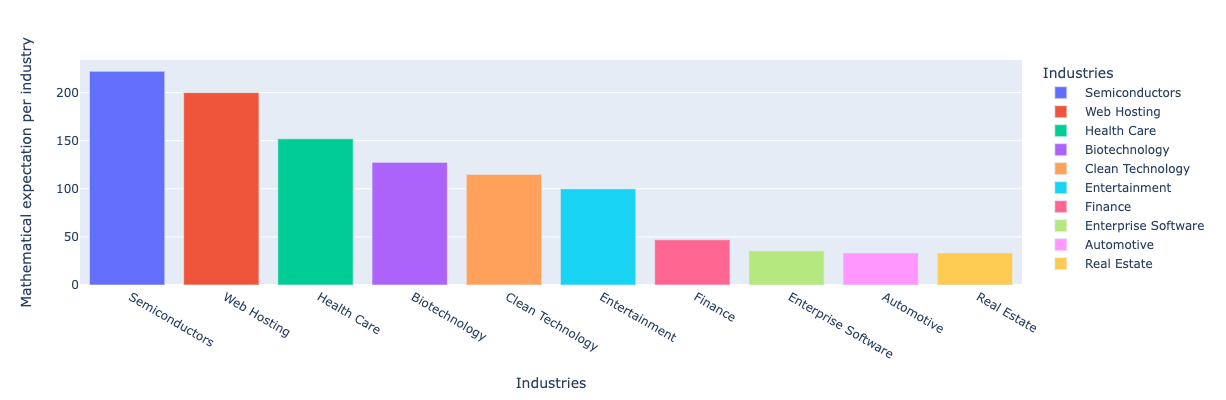

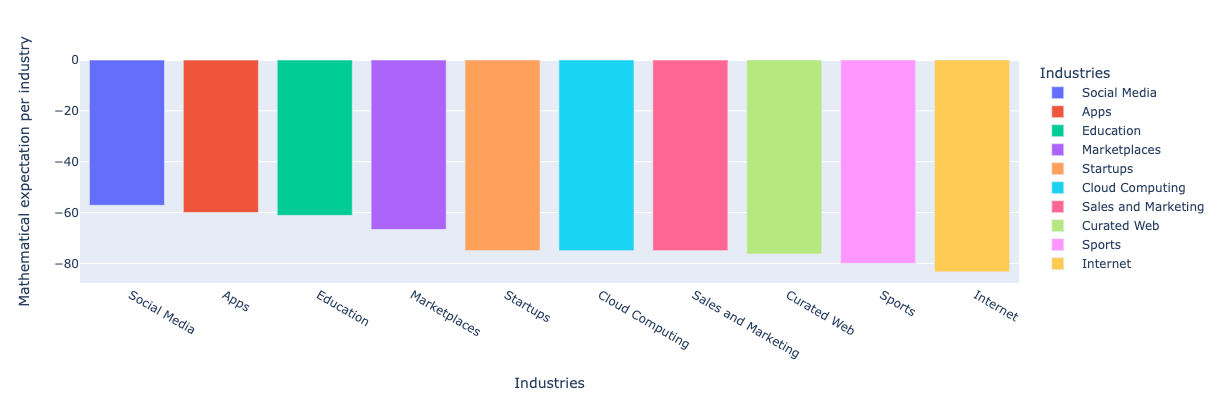

In [370]:
mathexp_more_than_50  = join_industry_top[join_industry_top['startups'] > 50]
mathexp_more_than_50  = mathexp_more_than_50[join_industry_top['expected_in_top'] > 0]

mathexp_group_industry_top = mathexp_more_than_50.sort_values(by='math_expectation', ascending=False)
mathexp_group_industry_top

fig13 = px.bar(mathexp_group_industry_top[:10], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig13.show()

fig14 = px.bar(mathexp_group_industry_top[-10:], x=' market ', y='math_expectation',
            color=' market ',
             labels={' market ': 'Industries', 'math_expectation':'Mathematical expectation per industry'}, height=400)
fig14.show()

### 2. Math Exp por país

In [371]:
group_country_count

country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
..          ...       ...            ...                  ...            ...   
81          ARM         1   2.651750e+07           26517500.0        (0, 50]   
80          UZB         1   9.000000e+04              90000.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   
78          MLT         1   4.294200e+05             429420.0        (0, 50]   
93          BHS         1   8.900000e+06            8900000.0        (0, 50]   

    percentage  
0    65.595644  
1     5.726081  
2     3.099384  
3     2.315563  
4     1.962544  
..         ...  
81    0.005983  
80    0.005983  
79    0.005983  
78    0.005983  
93    0.005983  

[94 rows x 6 columns]

In [372]:
total_startups = group_country_count['startups'].sum()
print('Numero total de startups con funding: ', total_startups)

group_country_count['expected_in_top'] = round(((group_country_count['percentage'] * 1000)/ 100),0)

group_country_count

Numero total de startups con funding:  16713


country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
..          ...       ...            ...                  ...            ...   
81          ARM         1   2.651750e+07           26517500.0        (0, 50]   
80          UZB         1   9.000000e+04              90000.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   
78          MLT         1   4.294200e+05             429420.0        (0, 50]   
93          BHS         1   8.900000e+06            8900000.0        (0, 50]   

    percentage  expected_in_top  
0    65.595644            656.0  
1     5.726081             57.0  
2     3.099384             31.0  
3     2.315563             23.0  
4     1.962544             20.0  
..         ...              ...  
81    0.005983              0.0  
80    0.005983              0.0  
79    0.005983              0.0  
78    0.005983              0.0  
93    0.005983              0.0  

[94 rows x 7 columns]

In [373]:
df_funded_no_outliers.sort_values(by='funding_total', ascending=False, inplace=True)
top_1000_country = df_funded_no_outliers[:1000]

top_1000_country = top_1000_country.groupby('country_code')['name'].count()

top_1000_country.sort_values(ascending=False, inplace=True)
top_1000_country = pd.DataFrame(data=top_1000_country )
top_1000_country.reset_index(inplace=True)

top_1000_country 

country_code  name
0           USA   710
1           CHN    65
2           GBR    47
3           CAN    21
4           ISR    20
5           IND    19
6           DEU    17
7           FRA    17
8           CHE    10
9           NLD    10
10          SGP     9
11          RUS     6
12          ESP     6
13          IRL     6
14          JPN     5
15          SWE     4
16          TUR     3
17          ARE     3
18          IDN     3
19          AUS     3
20          FIN     2
21          KOR     2
22          AUT     2
23          ARG     1
24          CZE     1
25          LTU     1
26          MAF     1
27          COL     1
28          POL     1
29          BRA     1
30          BEL     1
31          TWN     1
32          HKG     1

In [374]:
join_country_top = group_country_count.join(top_1000_country.set_index('country_code'), on='country_code')
join_country_top.rename(columns={'name':'startups_top'}, inplace=True)
join_country_top

country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
..          ...       ...            ...                  ...            ...   
81          ARM         1   2.651750e+07           26517500.0        (0, 50]   
80          UZB         1   9.000000e+04              90000.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   
78          MLT         1   4.294200e+05             429420.0        (0, 50]   
93          BHS         1   8.900000e+06            8900000.0        (0, 50]   

    percentage  expected_in_top  startups_top  
0    65.595644            656.0         710.0  
1     5.726081             57.0          47.0  
2     3.099384             31.0          21.0  
3     2.315563             23.0          17.0  
4     1.962544             20.0          20.0  
..         ...              ...           ...  
81    0.005983              0.0           NaN  
80    0.005983              0.0           NaN  
79    0.005983              0.0           1.0  
78    0.005983              0.0           NaN  
93    0.005983              0.0           NaN  

[94 rows x 8 columns]

In [375]:
join_country_top = join_country_top.dropna()
join_country_top

country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
5           IND       325   2.270296e+09            6985527.0    (200, 1000]   
6           DEU       315   2.236942e+09            7101403.0    (200, 1000]   
7           CHN       289   6.123163e+09           21187414.0    (200, 1000]   
8           ESP       244   8.221606e+08            3369511.0    (200, 1000]   
9           IRL       146   8.148781e+08            5581357.0      (50, 200]   
10          AUS       135   5.185831e+08            3841356.0      (50, 200]   
11          SGP       128   9.503248e+08            7424412.0      (50, 200]   
13          SWE       123   6.796420e+08            5525545.0      (50, 200]   
14          NLD       116   8.764071e+08            7555233.0      (50, 200]   
16          JPN       107   5.746151e+08            5370234.0      (50, 200]   
17          FIN       107   4.542406e+08            4245239.0      (50, 200]   
18          RUS        99   5.367232e+08            5421447.0      (50, 200]   
19          BRA        88   2.341761e+08            2661092.0      (50, 200]   
20          KOR        88   4.209828e+08            4783895.0      (50, 200]   
21          CHE        83   8.755594e+08           10548908.0      (50, 200]   
22          ARG        78   1.572708e+08            2016292.0      (50, 200]   
24          BEL        63   2.498475e+08            3965834.0      (50, 200]   
25          HKG        54   2.049134e+08            3794692.0      (50, 200]   
26          POL        40   9.147813e+07            2286953.0        (0, 50]   
27          TUR        35   1.614306e+08            4612303.0        (0, 50]   
28          AUT        35   1.549475e+08            4427070.0        (0, 50]   
31          ARE        30   2.195900e+08            7319667.0        (0, 50]   
39          CZE        18   1.242649e+08            6903606.0        (0, 50]   
43          LTU        15   6.164901e+07            4109934.0        (0, 50]   
45          COL        14   3.500502e+07            2500359.0        (0, 50]   
46          IDN        14   1.398900e+08            9992143.0        (0, 50]   
48          TWN        12   1.843704e+08           15364196.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   

    percentage  expected_in_top  startups_top  
0    65.595644            656.0         710.0  
1     5.726081             57.0          47.0  
2     3.099384             31.0          21.0  
3     2.315563             23.0          17.0  
4     1.962544             20.0          20.0  
5     1.944594             19.0          19.0  
6     1.884760             19.0          17.0  
7     1.729193             17.0          65.0  
8     1.459941             15.0           6.0  
9     0.873571              9.0           6.0  
10    0.807754              8.0           3.0  
11    0.765871              8.0           9.0  
13    0.735954              7.0           4.0  
14    0.694070              7.0          10.0  
16    0.640220              6.0           5.0  
17    0.640220              6.0           2.0  
18    0.592353              6.0           6.0  
19    0.526536              5.0           1.0  
20    0.526536              5.0           2.0  
21    0.496619              5.0          10.0  
22    0.466703              5.0           1.0  
24    0.376952              4.0           1.0  
25    0.323102              3.0           1.0  
26    0.239335              2.0           1.0  
27    0.209418              2.0           3.0  
28    0.209418              2.0   

In [376]:
join_country_top['math_expectation'] = round((((join_country_top['startups_top'] - join_country_top['expected_in_top']) / join_country_top['expected_in_top'])*100),2)
join_country_top

/var/folders/sy/nxmnw_wj4_v63snpccyy_vjc0000gn/T/ipykernel_10303/640772042.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country_code  startups  funding_total  avg_funding_country  Startup-Range  \
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
2           CAN       518   2.842588e+09            5487621.0    (200, 1000]   
3           FRA       387   2.533458e+09            6546403.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
5           IND       325   2.270296e+09            6985527.0    (200, 1000]   
6           DEU       315   2.236942e+09            7101403.0    (200, 1000]   
7           CHN       289   6.123163e+09           21187414.0    (200, 1000]   
8           ESP       244   8.221606e+08            3369511.0    (200, 1000]   
9           IRL       146   8.148781e+08            5581357.0      (50, 200]   
10          AUS       135   5.185831e+08            3841356.0      (50, 200]   
11          SGP       128   9.503248e+08            7424412.0      (50, 200]   
13          SWE       123   6.796420e+08            5525545.0      (50, 200]   
14          NLD       116   8.764071e+08            7555233.0      (50, 200]   
16          JPN       107   5.746151e+08            5370234.0      (50, 200]   
17          FIN       107   4.542406e+08            4245239.0      (50, 200]   
18          RUS        99   5.367232e+08            5421447.0      (50, 200]   
19          BRA        88   2.341761e+08            2661092.0      (50, 200]   
20          KOR        88   4.209828e+08            4783895.0      (50, 200]   
21          CHE        83   8.755594e+08           10548908.0      (50, 200]   
22          ARG        78   1.572708e+08            2016292.0      (50, 200]   
24          BEL        63   2.498475e+08            3965834.0      (50, 200]   
25          HKG        54   2.049134e+08            3794692.0      (50, 200]   
26          POL        40   9.147813e+07            2286953.0        (0, 50]   
27          TUR        35   1.614306e+08            4612303.0        (0, 50]   
28          AUT        35   1.549475e+08            4427070.0        (0, 50]   
31          ARE        30   2.195900e+08            7319667.0        (0, 50]   
39          CZE        18   1.242649e+08            6903606.0        (0, 50]   
43          LTU        15   6.164901e+07            4109934.0        (0, 50]   
45          COL        14   3.500502e+07            2500359.0        (0, 50]   
46          IDN        14   1.398900e+08            9992143.0        (0, 50]   
48          TWN        12   1.843704e+08           15364196.0        (0, 50]   
79          MAF         1   2.922000e+07           29220000.0        (0, 50]   

    percentage  expected_in_top  startups_top  math_expectation  
0    65.595644            656.0         710.0              8.23  
1     5.726081             57.0          47.0            -17.54  
2     3.099384             31.0          21.0            -32.26  
3     2.315563             23.0          17.0            -26.09  
4     1.962544             20.0          20.0              0.00  
5     1.944594             19.0          19.0              0.00  
6     1.884760             19.0          17.0            -10.53  
7     1.729193             17.0          65.0            282.35  
8     1.459941             15.0           6.0            -60.00  
9     0.873571              9.0           6.0            -33.33  
10    0.807754              8.0           3.0            -62.50  
11    0.765871              8.0           9.0             12.50  
13    0.735954              7.0           4.0            -42.86  
14    0.694070              7.0          10.0             42.86  
16    0.640220              6.0           5.0            -16.67  
17    0.640220              6.0           2.0            -66.67  
18    0.592353              6.0           6.0              0.00  
19    0.526536              5.0           1.0            -80.00  
20    0.526536              

   country_code  startups  funding_total  avg_funding_country  Startup-Range  \
7           CHN       289   6.123163e+09           21187414.0    (200, 1000]   
21          CHE        83   8.755594e+08           10548908.0      (50, 200]   
14          NLD       116   8.764071e+08            7555233.0      (50, 200]   
11          SGP       128   9.503248e+08            7424412.0      (50, 200]   
0           USA     10963   8.428879e+10            7688478.0  (1000, 15000]   
5           IND       325   2.270296e+09            6985527.0    (200, 1000]   
4           ISR       328   2.647206e+09            8070749.0    (200, 1000]   
18          RUS        99   5.367232e+08            5421447.0      (50, 200]   
6           DEU       315   2.236942e+09            7101403.0    (200, 1000]   
16          JPN       107   5.746151e+08            5370234.0      (50, 200]   
1           GBR       957   5.926667e+09            6192965.0    (200, 1000]   
3           FRA       387   2.533458e+09

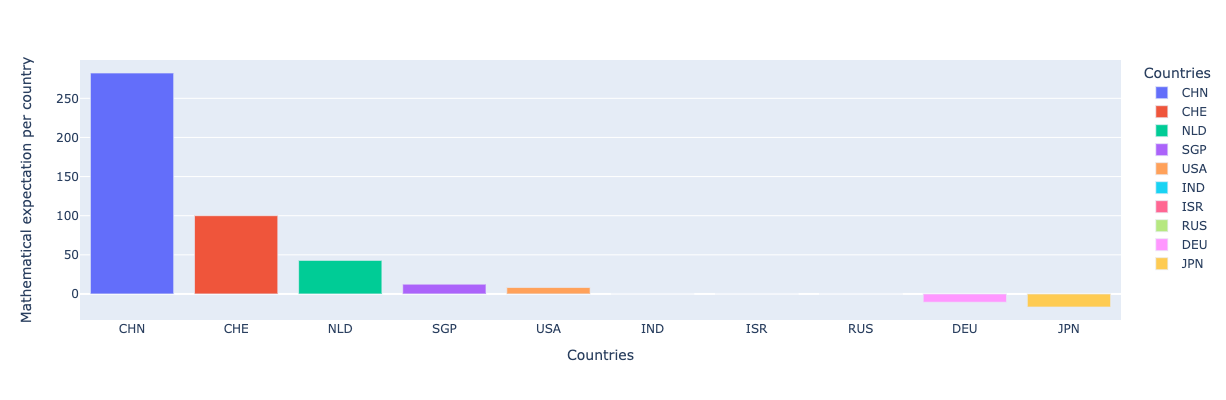

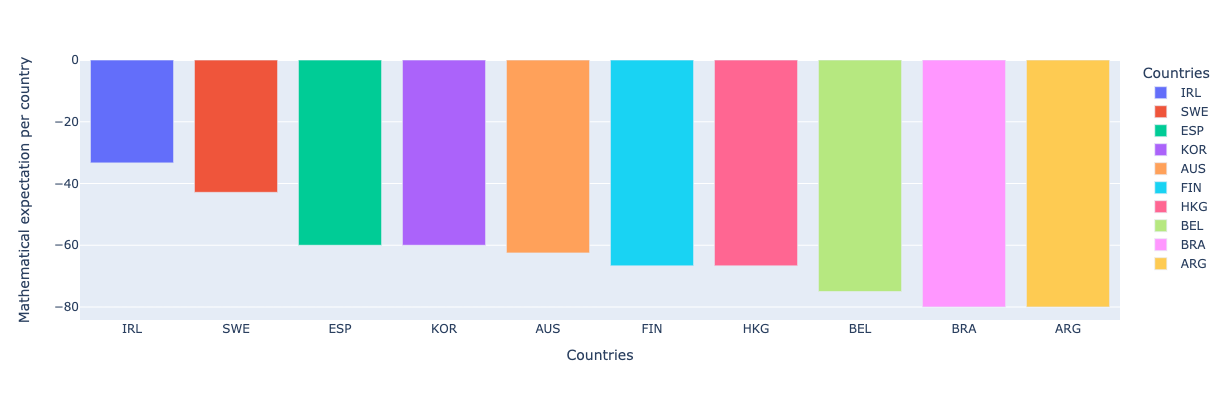

In [410]:
mathexp_more_than_50_country  = join_country_top[join_country_top['startups'] > 50]

mathexp_group_country_top = mathexp_more_than_50_country.sort_values(by='math_expectation', ascending=False)
print(mathexp_group_country_top)

fig15 = px.bar(mathexp_group_country_top[:10], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig15.show()

fig16 = px.bar(mathexp_group_country_top[-10:], x='country_code', y='math_expectation',
            color='country_code',
             labels={'country_code': 'Countries', 'math_expectation':'Mathematical expectation per country'}, height=400)
fig16.show()

In [378]:
df_funded_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 7506 to 25265
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   permalink                     16713 non-null  object         
 1   name                          16713 non-null  object         
 2   homepage_url                  16713 non-null  object         
 3   category_list                 16713 non-null  object         
 4    market                       16713 non-null  object         
 5    funding_total_usd            16713 non-null  object         
 6   status                        16713 non-null  object         
 7   country_code                  16713 non-null  object         
 8   state_code                    11481 non-null  object         
 9   region                        16713 non-null  object         
 10  city                          16713 non-null  object         
 11  funding_roun

In [379]:
df_funded_no_outliers.describe()

funding_rounds  founded_year          seed       venture  \
count    16713.000000  16713.000000  1.671300e+04  1.671300e+04   
mean         1.606055   2008.848022  3.692763e+05  6.366010e+06   
std          0.740112      3.570144  8.358746e+05  1.409038e+07   
min          1.000000   2000.000000  0.000000e+00  0.000000e+00   
25%          1.000000   2007.000000  0.000000e+00  0.000000e+00   
50%          1.000000   2010.000000  0.000000e+00  1.000000e+06   
75%          2.000000   2012.000000  3.250000e+05  6.153863e+06   
max          3.000000   2014.000000  2.483318e+07  1.770000e+08   

       equity_crowdfunding   undisclosed  convertible_note  debt_financing  \
count         1.671300e+04  1.671300e+04      1.671300e+04    1.671300e+04   
mean          2.432886e+03  2.004574e+04      9.587490e+03    1.286095e+05   
std           1.410888e+05  5.761644e+05      3.319446e+05    1.621908e+06   
min           0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%           0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
50%           0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
75%           0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
max           1.580867e+07  4.240000e+07      3.897941e+07    1.200000e+08   

              angel         grant  ...       round_C       round_D  \
count  1.671300e+04  1.671300e+04  ...  1.671300e+04  1.671300e+04   
mean   3.823969e+04  1.300675e+04  ...  9.432530e+05  2.905706e+05   
std    3.607970e+05  4.703448e+05  ...  5.794276e+06  3.682110e+06   
min    0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00   
max    2.000000e+07  5.000000e+07  ...  1.100000e+08  1.320000e+08   

            round_E       round_F       round_G       round_H  funding_total  \
count  1.671300e+04  1.671300e+04  1.671300e+04  1.671300e+04   1.671300e+04   
mean   8.205604e+04  2.388204e+04  1.848860e+03  2.931849e+03   7.160448e+06   
std    1.714899e+06  9.607622e+05  1.626052e+05  3.790259e+05   1.497587e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   6.000000e+01   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   4.079020e+05   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   1.800015e+06   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   7.000000e+06   
max    1.000000e+08  6.900000e+07  1.900000e+07  4.900000e+07   1.770000e+08   

        from_first_to_last_funding     from_founding_to_funding  \
count                        16713                        16713   
mean   300 days 09:04:52.730210016  902 days 12:43:17.738287568   
std    489 days 05:25:29.610198200  946 days 18:26:25.113613888   
min                0 days 00:00:00              0 days 00:00:00   
25%                0 days 00:00:00            231 days 00:00:00   
50%                0 days 00:00:00            577 days 00:00:00   
75%              475 days 00:00:00           1276 days 00:00:00   
max             5063 days 00:00:00           5416 days 00:00:00   

       from_founded_to_last_funding  
count                         16713  
mean   1202 days 21:48:10.468497568  
std    1058 days 09:50:03.176658512  
min                 0 days 00:00:00  
25%               424 days 00:00:00  
50%               895 days 00:00:00  
75%              1703 days 00:00:00  
max              5430 days 00:00:00  

[8 rows x 27 columns]

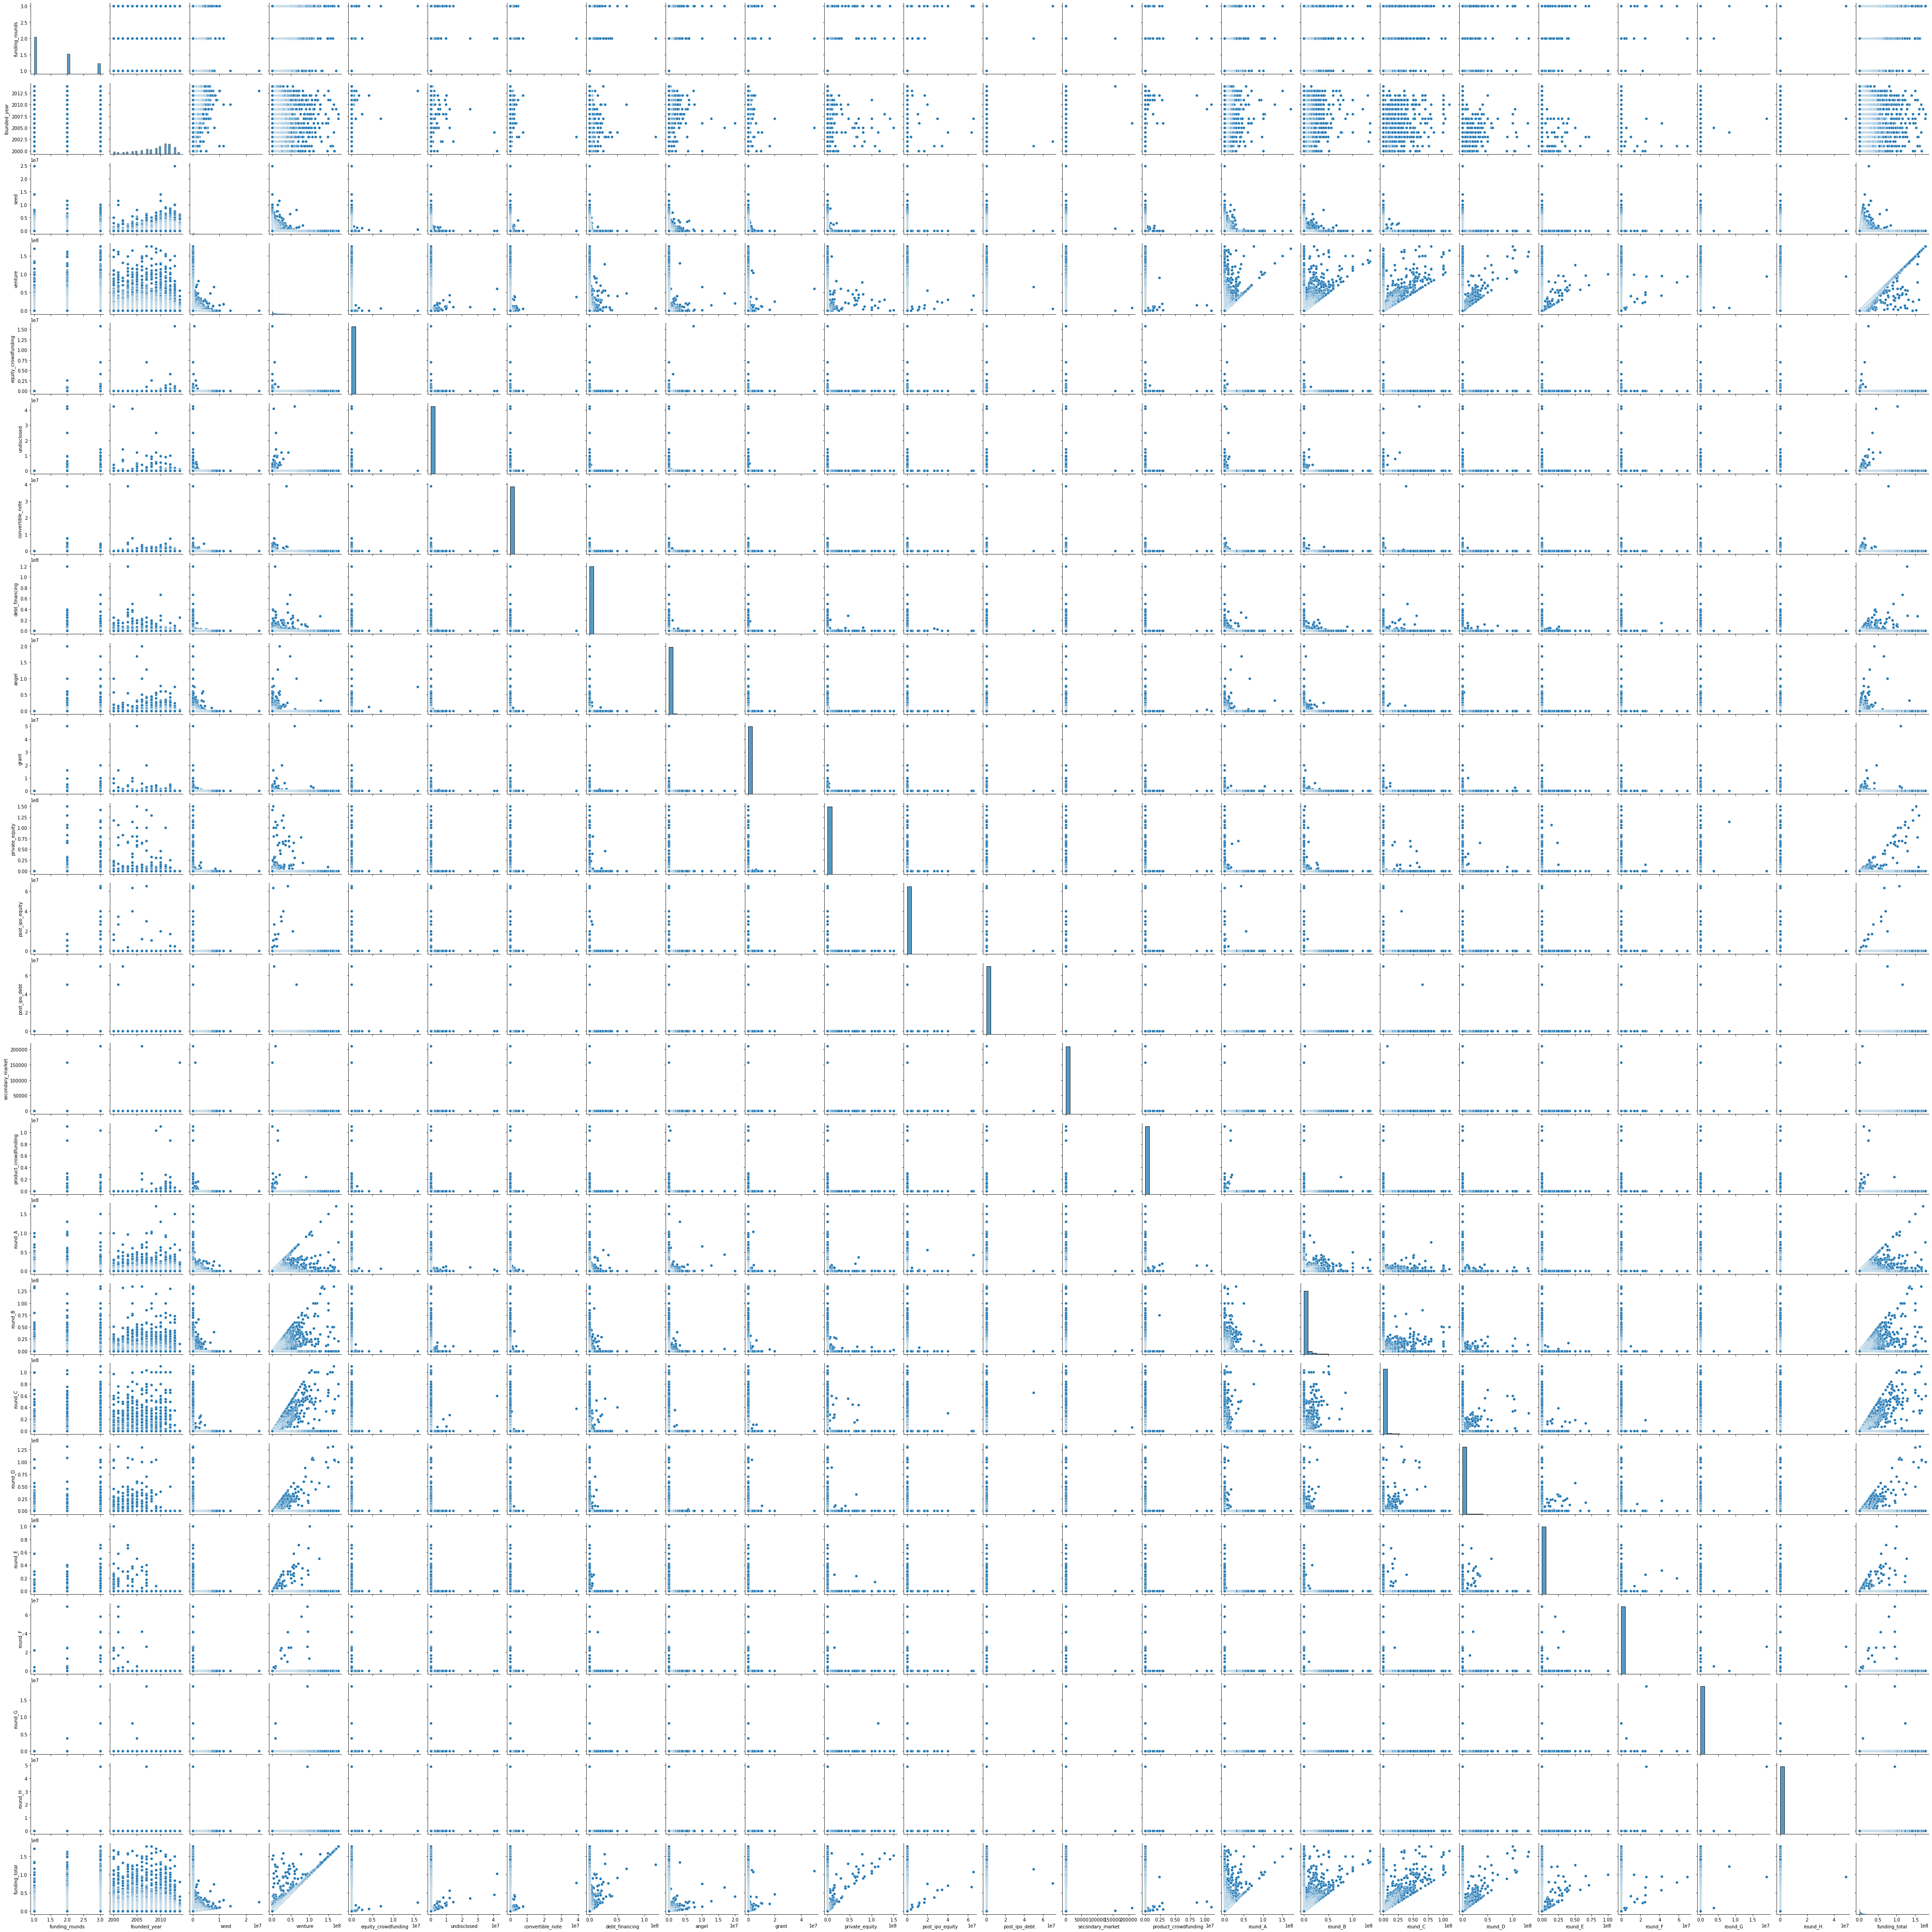

In [380]:
sns.pairplot(df_funded_no_outliers);

/Users/davidguix/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



permalink                         name  \
7506              /organization/castlight-health             Castlight Health   
33145            /organization/powa-technologies            Powa Technologies   
30058     /organization/official-limited-virtual     Official Limited Virtual   
2198               /organization/ambow-education              Ambow Education   
10649                      /organization/curevac                      CureVac   
...                                          ...                          ...   
36028                      /organization/ritetag                      RiteTag   
14431       /organization/executive-intermediary       Executive Intermediary   
14403  /organization/excel-business-intelligence  Excel Business Intelligence   
37783                 /organization/sevenlunches                 SevenLunches   
25265                   /organization/makercloud                   MakerCloud   

                               homepage_url  \
7506         http://www.castlighthealth.com   
33145                   http://www.powa.com   
30058      http://www.officialvirtualdj.com   
2198                   http://www.ambow.com   
10649                http://www.curevac.com   
...                                     ...   
36028                http://www.ritetag.com   
14431  http://www.executiveintermediary.com   
14403                      http://xlbin.com   
37783               http://sevenlunches.com   
25265                http://makercloud.io/#   

                                           category_list  \
7506                    |Technology|Health and Wellness|   
33145  |Coupons|Loyalty Programs|Retail Technology|Po...   
30058                                            |Music|   
2198                        |Customer Service|Education|   
10649                                    |Biotechnology|   
...                                                  ...   
36028  |File Sharing|Broadcasting|SEO|Social Media|Se...   
14431                          |Venture Capital|Finance|   
14403           |Startups|Business Services|Curated Web|   
37783  |Twitter Applications|Social Media|Email|SMS|M...   
25265                       |Marketplaces|Manufacturing|   

                      market   funding_total_usd      status country_code  \
7506              Technology        17,69,99,999   operating          USA   
33145          Point of Sale        17,67,00,000   operating          GBR   
30058                  Music        17,06,04,000      closed          GBR   
2198        Customer Service        16,70,00,000   operating          CHN   
10649          Biotechnology        16,60,07,000   operating          DEU   
...                       ...                 ...        ...          ...   
36028           File Sharing               1,000   operating          JPN   
14431        Venture Capital               1,000      closed          USA   
14403               Startups               1,000   operating          USA   
37783   Twitter Applications                 291   operating          USA   
25265           Marketplaces                  60   operating          DEU   

      state_code         region  ...     round_C      round_D round_E round_F  \
7506          CA    SF Bay Area  ...  60000000.0  100000000.0     0.0     0.0   
33145        NaN         London  ...  80000000.0          0.0     0.0     0.0   
30058        NaN         London  ...         0.0          0.0     0.0     0.0   
2198         NaN        Beijing  ...  54000000.0  103000000.0     0.0     0.0   
10649        NaN      Stuttgart  ...  34900000.0  104432000.0     0.0     0.0   
...          ...            ...  ...         ...          ...     ...     ...   
36028        NaN          Osaka  ...         0.0          0.0     0.0     0.0   
14431         NY  New York City  ...         0.0          0.0     0.0     0.0   
14403         WY       Cheyenne  ...         0.0          0.0     0.0     0.0   
37783         MA     MA - Other  ...         

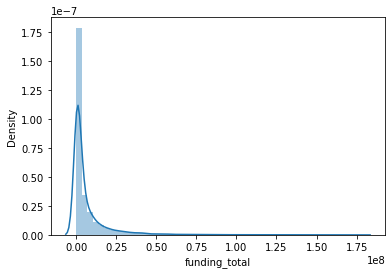

In [381]:
sns.distplot(df_funded_no_outliers['funding_total'])
df_funded_no_outliers

In [382]:
df_funded_no_outliers.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'funding_total', 'from_first_to_last_funding',
       'from_founding_to_funding', 'from_founded_to_last_funding'],
      dtype='object')

In [383]:

print(avg_funding_per_country['country_code'].count())
print(group_country_count['country_code'].count())
print(join_country_top['country_code'].count())

print(join_country_top['country_code'].values)
print(join_country_top['math_expectation'].values)

df_funded_no_outliers['country_code'].values

50
94
33
['USA' 'GBR' 'CAN' 'FRA' 'ISR' 'IND' 'DEU' 'CHN' 'ESP' 'IRL' 'AUS' 'SGP'
 'SWE' 'NLD' 'JPN' 'FIN' 'RUS' 'BRA' 'KOR' 'CHE' 'ARG' 'BEL' 'HKG' 'POL'
 'TUR' 'AUT' 'ARE' 'CZE' 'LTU' 'COL' 'IDN' 'TWN' 'MAF']
[  8.23 -17.54 -32.26 -26.09   0.     0.   -10.53 282.35 -60.   -33.33
 -62.5   12.5  -42.86  42.86 -16.67 -66.67   0.   -80.   -60.   100.
 -80.   -75.   -66.67 -50.    50.     0.    50.     0.     0.     0.
 200.     0.      inf]


array(['USA', 'GBR', 'GBR', ..., 'USA', 'USA', 'DEU'], dtype=object)

In [384]:

#POR aqui

new_df_country = df_funded_no_outliers
'''
new_df_country['country_code'].replace(
    ['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'IND', 'DEU', 'CHN', 'ESP',
       'IRL', 'AUS', 'SGP', 'SWE', 'NLD', 'JPN', 'FIN', 'RUS', 'BRA',
       'KOR', 'CHE', 'ARG', 'BEL', 'HKG', 'POL', 'TUR', 'AUT', 'ARE',
       'CZE', 'LTU', 'COL', 'IDN', 'TWN', 'MAF'],[ 8.23, -17.54, -32.26, -26.09,   0.,     0.,   -10.53, 282.35, -60.,   -33.33,
 -62.5,   12.5,  -42.86,  42.86, -16.67, -66.67,   0.,   -80.,   -60.,   100.,
 -80.,   -75.,   -66.67, -50.,    50.,     0.,    50.,     0.,     0.,     0.,
 200.,     0.,      0])
 '''
#new_df_country.sort_values(by='country_code', ascending=True)
#new_df_country['country_code'].values
group_country_code = new_df_country.groupby('country_code')
print(group_country_code)

In [385]:
df_funded_no_outliers.dtypes

permalink                                object
name                                     object
homepage_url                             object
category_list                            object
 market                                  object
 funding_total_usd                       object
status                                   object
country_code                             object
state_code                               object
region                                   object
city                                     object
funding_rounds                          float64
founded_at                       datetime64[ns]
founded_month                            object
founded_quarter                          object
founded_year                            float64
first_funding_at                 datetime64[ns]
last_funding_at                  datetime64[ns]
seed                                    float64
venture                                 float64
equity_crowdfunding                     

In [386]:
X = df_funded_no_outliers[['funding_rounds', 'founded_year', 'seed', 'round_A', 'round_B']]
X

funding_rounds  founded_year    seed      round_A     round_B
7506              3.0        2008.0     0.0          0.0         0.0
33145             3.0        2007.0     0.0   76000000.0  20700000.0
30058             1.0        2009.0     0.0  170604000.0         0.0
2198              3.0        2000.0     0.0   10000000.0         0.0
10649             3.0        2000.0     0.0          0.0  26675000.0
...               ...           ...     ...          ...         ...
36028             1.0        2012.0  1000.0          0.0         0.0
14431             1.0        2007.0  1000.0          0.0         0.0
14403             1.0        2012.0  1000.0          0.0         0.0
37783             1.0        2009.0     0.0        291.0         0.0
25265             1.0        2013.0    60.0          0.0         0.0

[16713 rows x 5 columns]

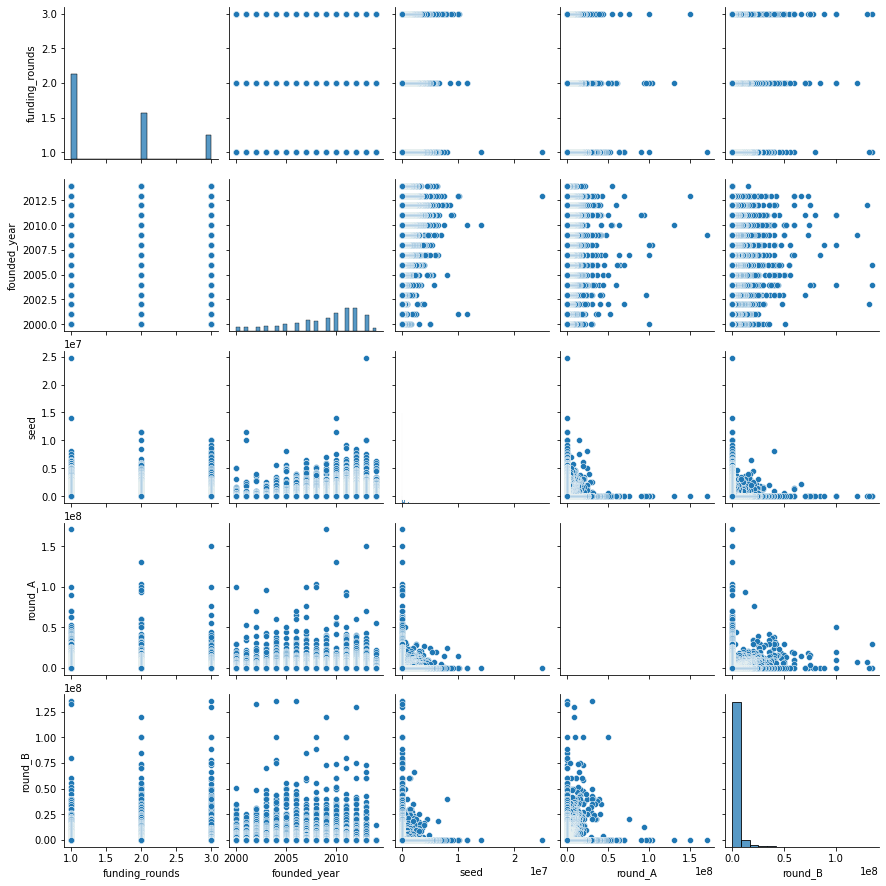

In [387]:
sns.pairplot(X);

In [388]:
Y = df_funded_no_outliers[['funding_total']]
Y

funding_total
7506     176999999.0
33145    176700000.0
30058    170604000.0
2198     167000000.0
10649    166007000.0
...              ...
36028         1000.0
14431         1000.0
14403         1000.0
37783          291.0
25265           60.0

[16713 rows x 1 columns]

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [390]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Total target shape:", Y.shape)
print("Train target shape:", Y_train.shape)
print("Test target shape:", Y_test.shape)

Total features shape: (16713, 5)
Train features shape: (11699, 5)
Test features shape: (5014, 5)
Total target shape: (16713, 1)
Train target shape: (11699, 1)
Test target shape: (5014, 1)


In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
lm = LinearRegression()

lm.fit(X_train, Y_train)

LinearRegression()

In [393]:
X.columns

Index(['funding_rounds', 'founded_year', 'seed', 'round_A', 'round_B'], dtype='object')

In [394]:
#QUE ES ESTO?

print(lm.intercept_)

[1.53084725e+09]


In [395]:
print(lm.coef_)

[[ 3.08694320e+06 -7.62518286e+05 -9.94666408e-02  8.92347088e-01
   1.07051384e+00]]


In [396]:
coeff_df = pd.DataFrame(lm.coef_[0], X.columns, columns=['Coefficient'])
coeff_df

Coefficient
funding_rounds  3.086943e+06
founded_year   -7.625183e+05
seed           -9.946664e-02
round_A         8.923471e-01
round_B         1.070514e+00

In [397]:
X_test

funding_rounds  founded_year       seed     round_A     round_B
36639             2.0        2006.0        0.0   4000000.0   5000000.0
13208             1.0        2012.0  4500000.0         0.0         0.0
37783             1.0        2009.0        0.0       291.0         0.0
18045             2.0        2008.0        0.0         0.0         0.0
30712             1.0        2012.0    65684.0         0.0         0.0
...               ...           ...        ...         ...         ...
34794             1.0        2009.0   435413.0         0.0         0.0
32606             2.0        2002.0        0.0         0.0  12000000.0
10109             1.0        2010.0        0.0         0.0         0.0
36941             3.0        2011.0  2000000.0  10500000.0         0.0
8190              2.0        2012.0  1100000.0         0.0         0.0

[5014 rows x 5 columns]

In [398]:
predictions = lm.predict(X_test)
predictions

array([[16331414.12692261],
       [ -700196.21931744],
       [ 2035218.19418979],
       ...,
       [ 1272440.23551321],
       [15854519.49457979],
       [ 2724933.56221938]])

In [402]:
predictions_train = lm.predict(X_train)
predictions_train

array([[ -451529.61738276],
       [-1779139.72732401],
       [  450241.96537471],
       ...,
       [14686119.7746594 ],
       [29264301.53570366],
       [ -256575.00146604]])

/Users/davidguix/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

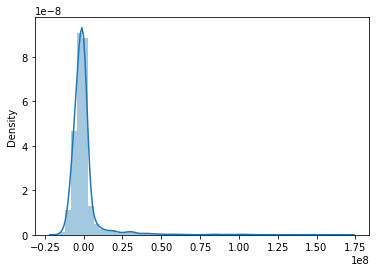

In [399]:
sns.distplot((Y_test - predictions))

In [401]:
from sklearn import metrics

print('test score:',lm.score(X_test, Y_test))
print('train score:', lm.score(X_train, Y_train))



test score: 0.4441725880787193
train score: 0.4818902486639801


In [408]:
print('error in TEST')
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

error in TEST
MAE: 4976835.869125692
MSE: 128320718730581.83
MAPE: 12.182124395881127
RMSE: 11327873.530834543


In [409]:
print('error in TRAIN')
print('MAE:', metrics.mean_absolute_error(Y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(Y_train, predictions_train))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, predictions_train)))

error in TRAIN
MAE: 4858255.798618247
MSE: 114724684615516.4
MAPE: 12.611361562747964
RMSE: 10710960.956679676
